# Scater: quality control and filtering

In [2]:
suppressPackageStartupMessages({
    library(Matrix)
    library(DropletUtils)
    library(scater)
    library(cowplot)
})

## Reading 10X data

In [14]:
E12.5 <- read10xCounts(samples = "data/e12_5_filtered_feature_bc_matrix")
E12.5

class: SingleCellExperiment 
dim: 31066 3486 
metadata(1): Samples
assays(1): counts
rownames(31066): ENSMUSG00000051951 ENSMUSG00000089699 ...
  selection_blasticidin-R_pLX304 dCas9
rowData names(3): ID Symbol Type
colnames: NULL
colData names(2): Sample Barcode
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [15]:
colData(E12.5)$Barcode <- paste("E12.5", colData(E12.5)$Barcode, sep = "_")

In [17]:
E13.5 <- read10xCounts(samples = "data/e13_5_filtered_feature_bc_matrix")
E13.5

class: SingleCellExperiment 
dim: 31066 8343 
metadata(1): Samples
assays(1): counts
rownames(31066): ENSMUSG00000051951 ENSMUSG00000089699 ...
  selection_blasticidin-R_pLX304 dCas9
rowData names(3): ID Symbol Type
colnames: NULL
colData names(2): Sample Barcode
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [18]:
colData(E13.5)$Barcode <- paste("E13.5", colData(E13.5)$Barcode, sep = "_")

In [19]:
E14.5 <- read10xCounts(samples = "data/e14_5_filtered_feature_bc_matrix")
E14.5

class: SingleCellExperiment 
dim: 31066 2109 
metadata(1): Samples
assays(1): counts
rownames(31066): ENSMUSG00000051951 ENSMUSG00000089699 ...
  selection_blasticidin-R_pLX304 dCas9
rowData names(3): ID Symbol Type
colnames: NULL
colData names(2): Sample Barcode
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [20]:
colData(E14.5)$Barcode <- paste("E14.5", colData(E14.5)$Barcode, sep = "_")

In [21]:
E15.5 <- read10xCounts(samples = "data/e15_5_filtered_feature_bc_matrix")
E15.5

class: SingleCellExperiment 
dim: 31066 1469 
metadata(1): Samples
assays(1): counts
rownames(31066): ENSMUSG00000051951 ENSMUSG00000089699 ...
  selection_blasticidin-R_pLX304 dCas9
rowData names(3): ID Symbol Type
colnames: NULL
colData names(2): Sample Barcode
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [22]:
colData(E15.5)$Barcode <- paste("E15.5", colData(E15.5)$Barcode, sep = "_")

In [23]:
SynJ <- cbind(E12.5, E13.5, E14.5, E15.5)

In [24]:
counts_SynJ <- as.matrix(counts(SynJ))
colnames(counts_SynJ) <- SynJ$Barcode
rownames(counts_SynJ) <- rowData(SynJ)$Symbol
counts_SynJ

,E12.5_AAACCTGAGGCGTACA-1,E12.5_AAACCTGCACTGCCAG-1,E12.5_AAACCTGCATCAGTAC-1,E12.5_AAACCTGGTGAGTGAC-1,E12.5_AAACCTGGTTGCCTCT-1,E12.5_AAACCTGTCGAGAACG-1,E12.5_AAACCTGTCGATCCCT-1,E12.5_AAACCTGTCGTAGATC-1,E12.5_AAACGGGAGAATGTTG-1,E12.5_AAACGGGCAAGTCTGT-1,⋯,E15.5_TTTATGCGTAGAGTGC-1,E15.5_TTTATGCGTTCTGAAC-1,E15.5_TTTCCTCAGAATTCCC-1,E15.5_TTTGCGCTCATCACCC-1,E15.5_TTTGGTTAGACAGGCT-1,E15.5_TTTGGTTAGATAGTCA-1,E15.5_TTTGGTTGTAAATACG-1,E15.5_TTTGGTTTCTCTTATG-1,E15.5_TTTGTCAAGCGTCTAT-1,E15.5_TTTGTCACACGAAACG-1
Xkr4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Gm1992,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Gm37381,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Rp1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Sox17,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Gm37323,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Mrpl15,2,0,1,0,2,2,1,0,0,1,⋯,0,0,1,0,0,0,1,4,0,4
Lypla1,0,0,2,0,1,0,0,0,1,0,⋯,0,0,1,0,0,0,1,1,0,0
Gm37988,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Tcea1,0,0,2,0,2,0,0,2,2,2,⋯,1,0,3,1,0,0,0,4,0,1


In [25]:
dim(SynJ)

[1] 31066 15407

## Loading non-10X datasets

In [7]:
# dir.create("1.3.scater")

In [8]:
# setwd("1.3.scater/")

In [9]:
# matrix <- readRDS(file = "/mnt/c/Users/u0124158/Documents/NGS/DebnathPSC/geneCounts/matrix.Rds")
# matrix[1:5, 1:5]

In [10]:
# matrix = as.matrix(matrix)
# dim(matrix)

## Barcode and feature files

### Barcode file

In [11]:
# barcodes <- colnames(matrix)
# barcodes <- as.data.frame(barcodes)

# write.table(barcodes, file = "barcodes.tsv", quote = FALSE, row.names = FALSE)

### Feature file

In [12]:
# features <- rownames(matrix)

# write.table(features, file = "features.tsv", quote = FALSE, row.names = FALSE)

## The `SingleCellExperiment` object

In [13]:
# matrix_dir = "./"

In [14]:
# barcode.path <- paste0(matrix_dir, "barcodes.tsv")
# features.path <- paste0(matrix_dir, "features.tsv")
# metadata.path <- paste0(matrix_dir, "metadata.tsv")

In [15]:
# feature.names = read.delim(features.path, header = FALSE, stringsAsFactors = FALSE)
# barcode.names = read.delim(barcode.path, header = FALSE, stringsAsFactors = FALSE)
# metadata = read.delim(metadata.path, header = FALSE, stringsAsFactors = FALSE)

In [16]:
# colnames(feature.names) <- c("GeneID")

In [17]:
# colnames(metadata) <- c("Cells", "Origin", "Organism")

# # sort the metadata to match the order of the columns
# metadata <- metadata[order(match(metadata[,1], barcode.names[,1])),]

### Generate the object

In [18]:
# sceMP <- SingleCellExperiment(assays = list(counts = matrix),
#                               colData = metadata,
#                               rowData = feature.names)
# sceMP

In [19]:
# colData(sceMP)

In [20]:
# rowData(sceMP)

Dimensions of the raw data are **26.288 genes and 691 cells**.

## Calculating QC metrics

First we identify rows corresponding to mitochondrial genes, which can be found based on the rownames.

In [26]:
is.mito <- grepl("^mt-", rowData(E12.5)$Symbol)
mito.list <- grep("^mt-", rowData(E12.5)$Symbol, value = TRUE)

In [27]:
mito.list

[1] "mt-Nd1"  "mt-Nd2"  "mt-Co1"  "mt-Co2"  "mt-Atp8" "mt-Atp6" "mt-Co3" 
 [8] "mt-Nd3"  "mt-Nd4l" "mt-Nd4"  "mt-Nd5"  "mt-Nd6"  "mt-Cytb"

For each cell we calculate quality control metrics such as the total number of counts or the proportion of counts in mitochondrial genes.

In [28]:
SynJ <- calculateQCMetrics(SynJ, feature_controls = list(Mt = is.mito))
head(colnames(colData(SynJ)),7)

Warning message:
“'calculateQCMetrics' is deprecated.
Use 'perCellQCMetrics' or 'perFeatureQCMetrics' instead.”


[1] "Sample"                         "Barcode"                       
[3] "is_cell_control"                "total_features_by_counts"      
[5] "log10_total_features_by_counts" "total_counts"                  
[7] "log10_total_counts"

In [68]:
E12.5 <- calculateQCMetrics(E12.5, feature_controls = list(Mt = is.mito))
head(colnames(colData(E12.5)),7)
E13.5 <- calculateQCMetrics(E13.5, feature_controls = list(Mt = is.mito))
head(colnames(colData(E13.5)),7)
E14.5 <- calculateQCMetrics(E14.5, feature_controls = list(Mt = is.mito))
head(colnames(colData(E14.5)),7)
E15.5 <- calculateQCMetrics(E15.5, feature_controls = list(Mt = is.mito))
head(colnames(colData(E15.5)),7)

Warning message:
“'calculateQCMetrics' is deprecated.
Use 'perCellQCMetrics' or 'perFeatureQCMetrics' instead.”


[1] "Sample"                         "Barcode"                       
[3] "is_cell_control"                "total_features_by_counts"      
[5] "log10_total_features_by_counts" "total_counts"                  
[7] "log10_total_counts"

Warning message:
“'calculateQCMetrics' is deprecated.
Use 'perCellQCMetrics' or 'perFeatureQCMetrics' instead.”


[1] "Sample"                         "Barcode"                       
[3] "is_cell_control"                "total_features_by_counts"      
[5] "log10_total_features_by_counts" "total_counts"                  
[7] "log10_total_counts"

Warning message:
“'calculateQCMetrics' is deprecated.
Use 'perCellQCMetrics' or 'perFeatureQCMetrics' instead.”


[1] "Sample"                         "Barcode"                       
[3] "is_cell_control"                "total_features_by_counts"      
[5] "log10_total_features_by_counts" "total_counts"                  
[7] "log10_total_counts"

Warning message:
“'calculateQCMetrics' is deprecated.
Use 'perCellQCMetrics' or 'perFeatureQCMetrics' instead.”


[1] "Sample"                         "Barcode"                       
[3] "is_cell_control"                "total_features_by_counts"      
[5] "log10_total_features_by_counts" "total_counts"                  
[7] "log10_total_counts"

In [69]:
head(colnames(rowData(E12.5)),10)
head(colnames(rowData(E13.5)),10)
head(colnames(rowData(E14.5)),10)
head(colnames(rowData(E15.5)),10)

[1] "ID"                    "Symbol"                "Type"                 
 [4] "is_feature_control"    "is_feature_control_Mt" "mean_counts"          
 [7] "log10_mean_counts"     "n_cells_by_counts"     "pct_dropout_by_counts"
[10] "total_counts"

[1] "ID"                    "Symbol"                "Type"                 
 [4] "is_feature_control"    "is_feature_control_Mt" "mean_counts"          
 [7] "log10_mean_counts"     "n_cells_by_counts"     "pct_dropout_by_counts"
[10] "total_counts"

[1] "ID"                    "Symbol"                "Type"                 
 [4] "is_feature_control"    "is_feature_control_Mt" "mean_counts"          
 [7] "log10_mean_counts"     "n_cells_by_counts"     "pct_dropout_by_counts"
[10] "total_counts"

[1] "ID"                    "Symbol"                "Type"                 
 [4] "is_feature_control"    "is_feature_control_Mt" "mean_counts"          
 [7] "log10_mean_counts"     "n_cells_by_counts"     "pct_dropout_by_counts"
[10] "total_counts"

In [29]:
head(colnames(rowData(SynJ)),10)

[1] "ID"                    "Symbol"                "Type"                 
 [4] "is_feature_control"    "is_feature_control_Mt" "mean_counts"          
 [7] "log10_mean_counts"     "n_cells_by_counts"     "pct_dropout_by_counts"
[10] "total_counts"

### Quality control of the cells

Low-quality cells need to be removed to ensure that technical effects do not distort downstream analysis
results. Two common measures of cell quality are the library size and the number of expressed features in
each library. The library size is defined as the total sum of counts across all features, i.e. genes. Cells with
relatively small library sizes are considered to be of low quality as the RNA has not been efficiently captured
(i.e. converted into cDNA and amplified) during library preparation. The number of expressed features in
each cell is defined as the number of features with non-zero counts for that cell. Any cell with very few
expressed genes is likely to be of poor quality as the diverse transcript population has not been successfully
captured. The distribution of both of these metrics can be seen in the histograms below.

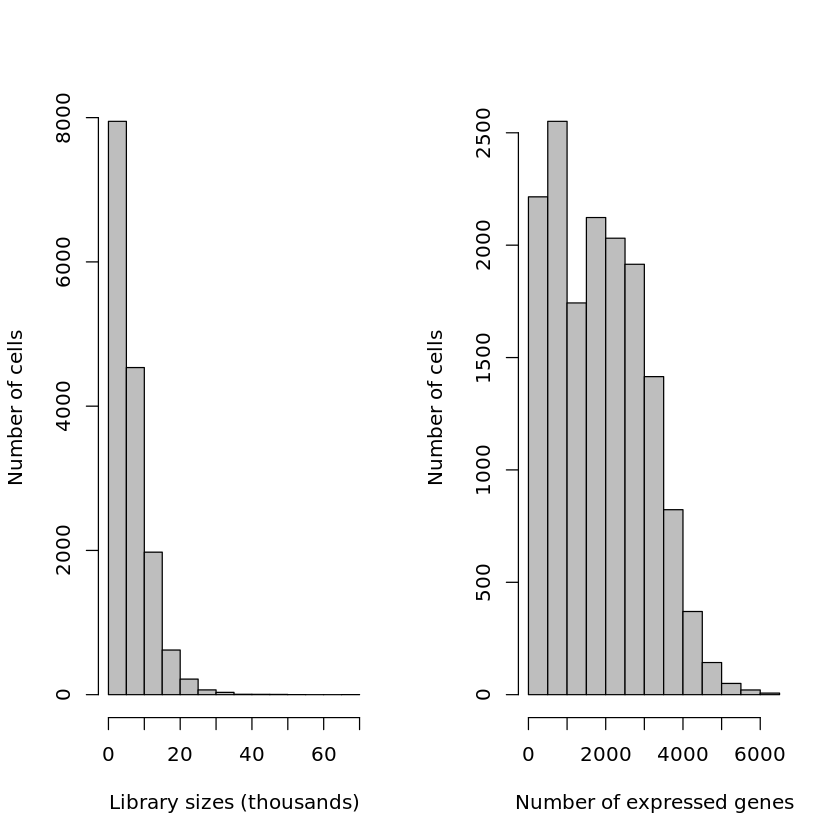

In [30]:
par(mfrow = c(1,2))
hist(SynJ$total_counts/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")
hist(SynJ$total_features_by_counts, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

options(repr.plot.width = 16, repr.plot.height = 8)

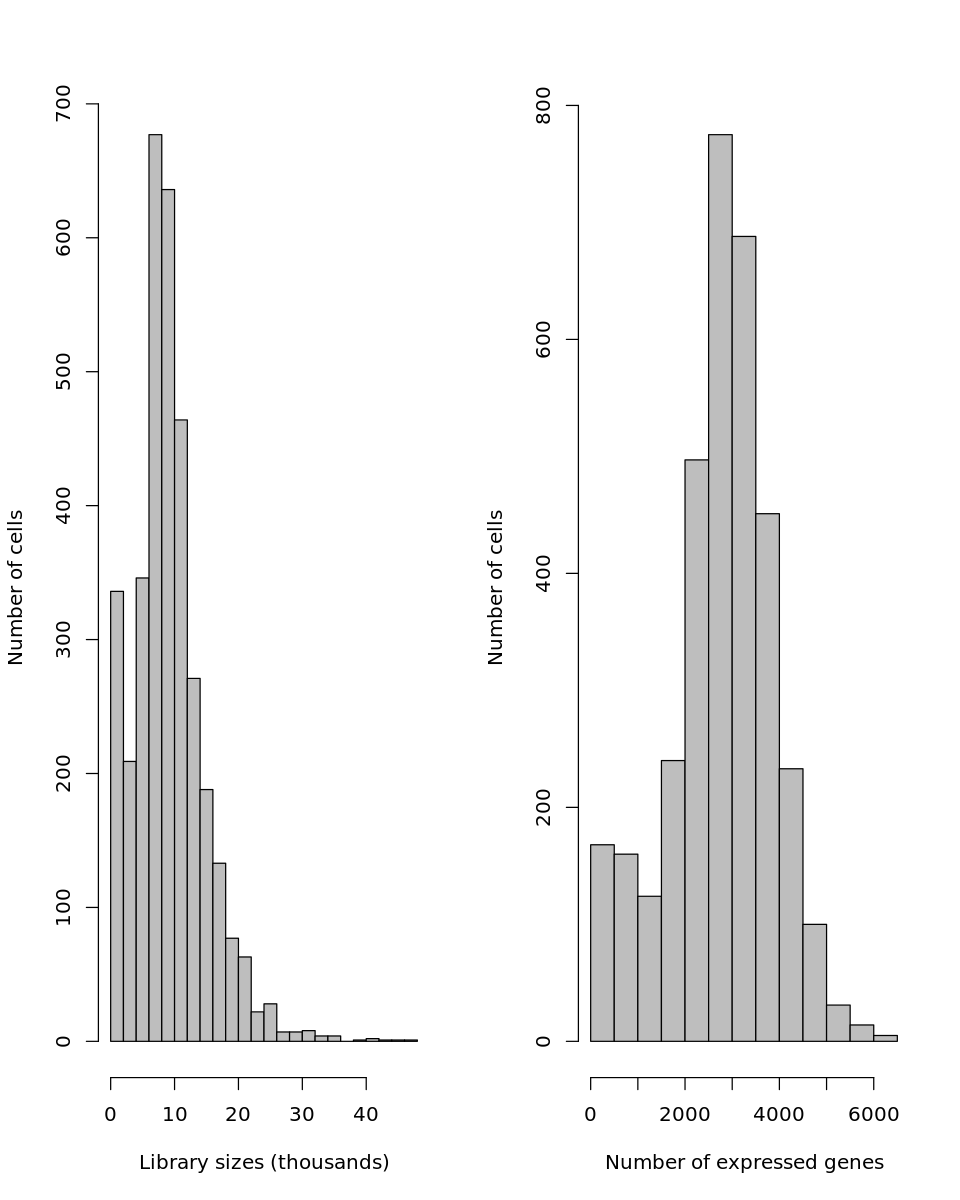

In [70]:
par(mfrow = c(1,2))
hist(E12.5$total_counts/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")
hist(E12.5$total_features_by_counts, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

options(repr.plot.width = 16, repr.plot.height = 8)

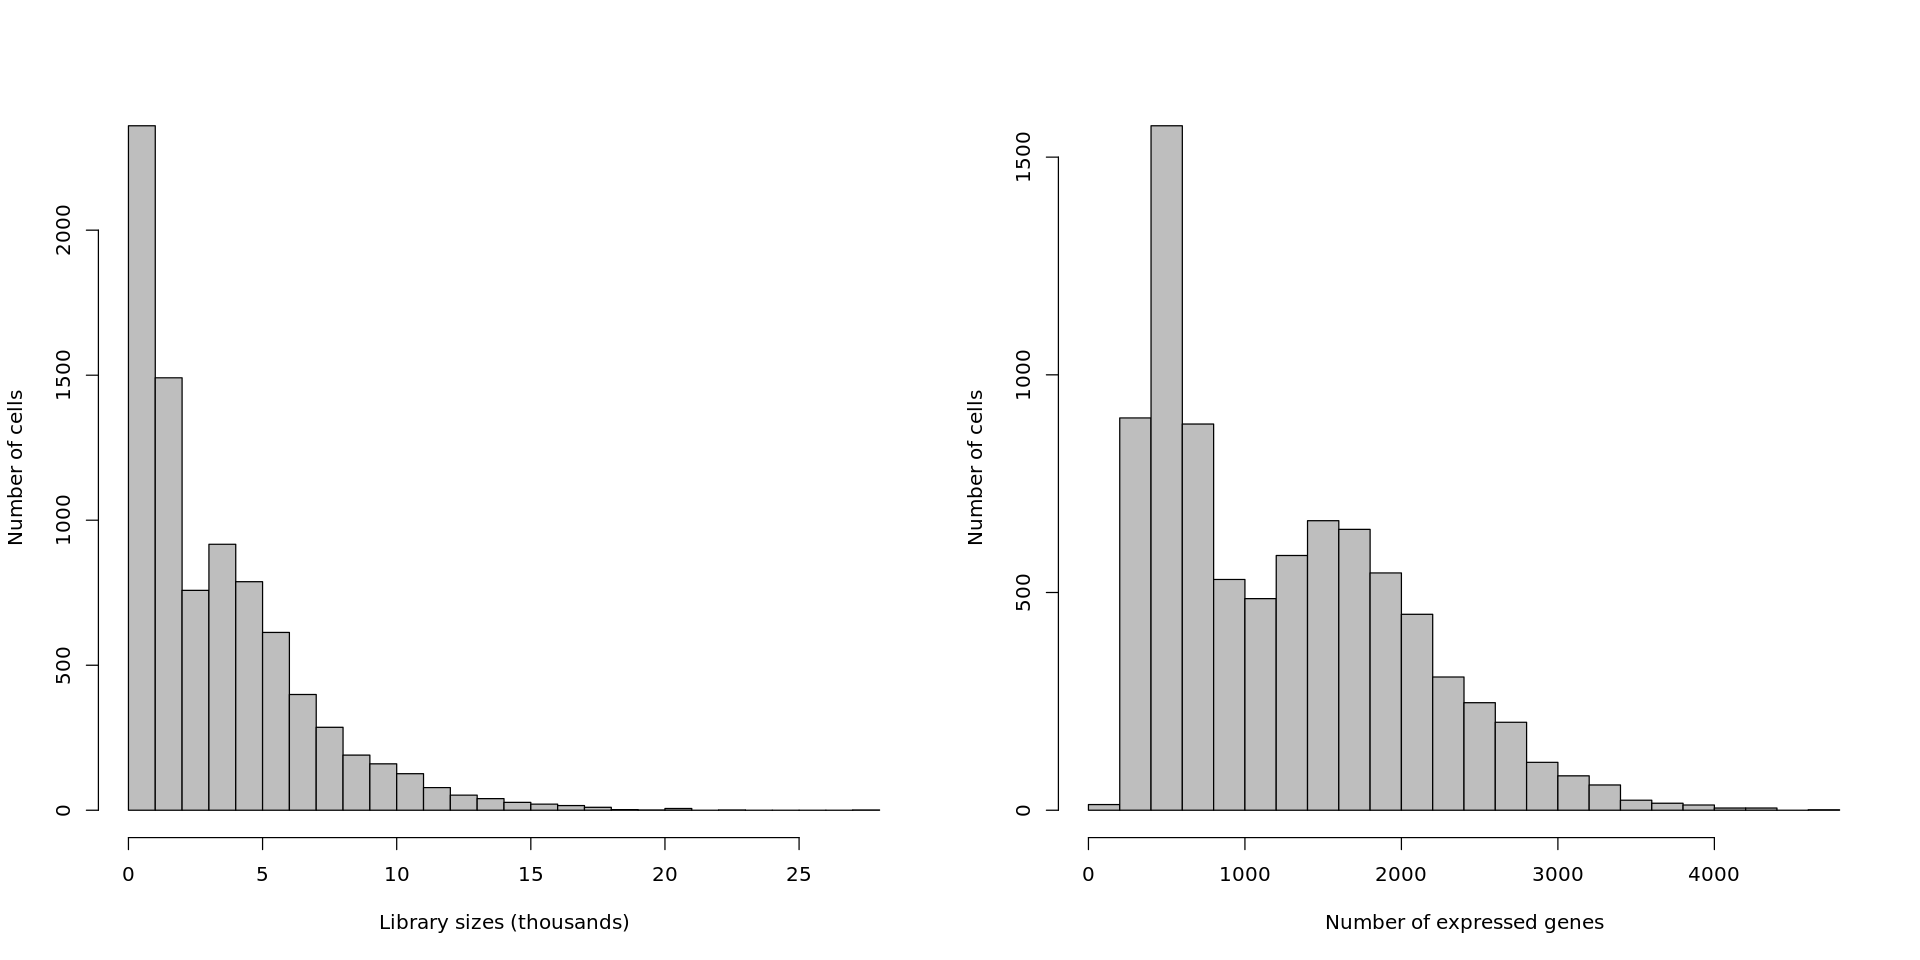

In [71]:
par(mfrow = c(1,2))
hist(E13.5$total_counts/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")
hist(E13.5$total_features_by_counts, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

options(repr.plot.width = 16, repr.plot.height = 8)

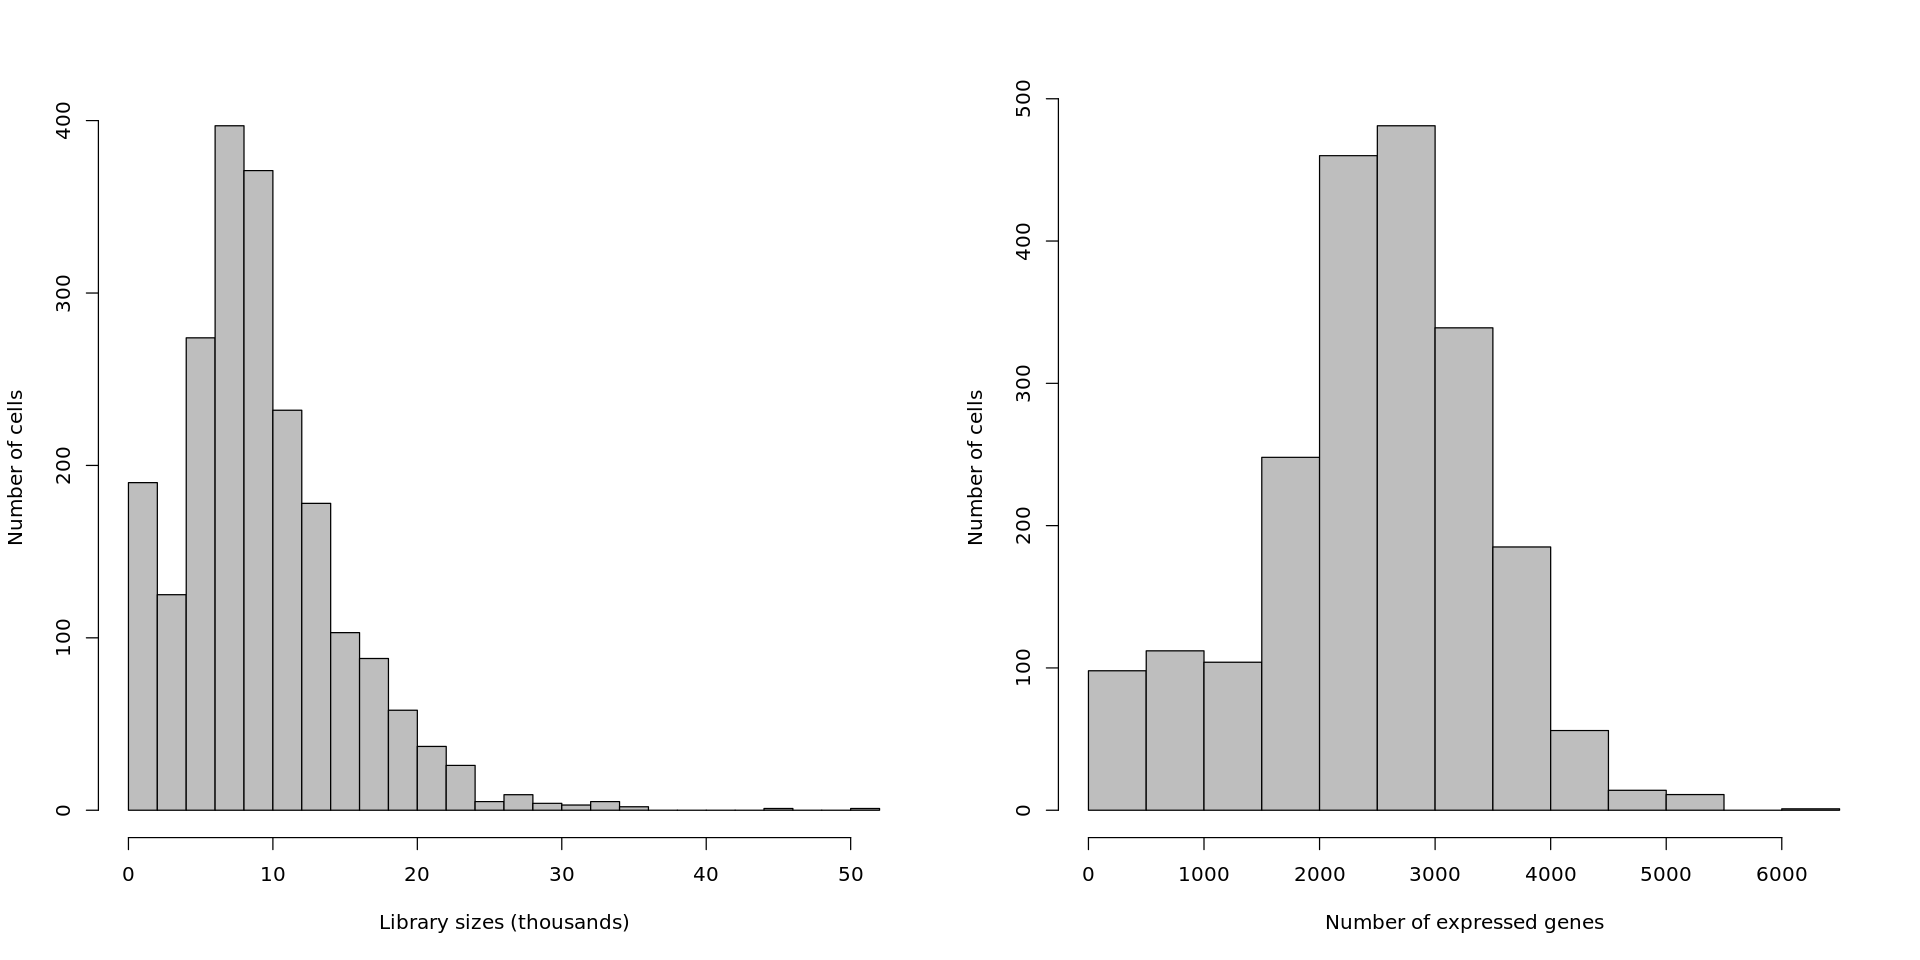

In [72]:
par(mfrow = c(1,2))
hist(E14.5$total_counts/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")
hist(E14.5$total_features_by_counts, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

options(repr.plot.width = 16, repr.plot.height = 8)

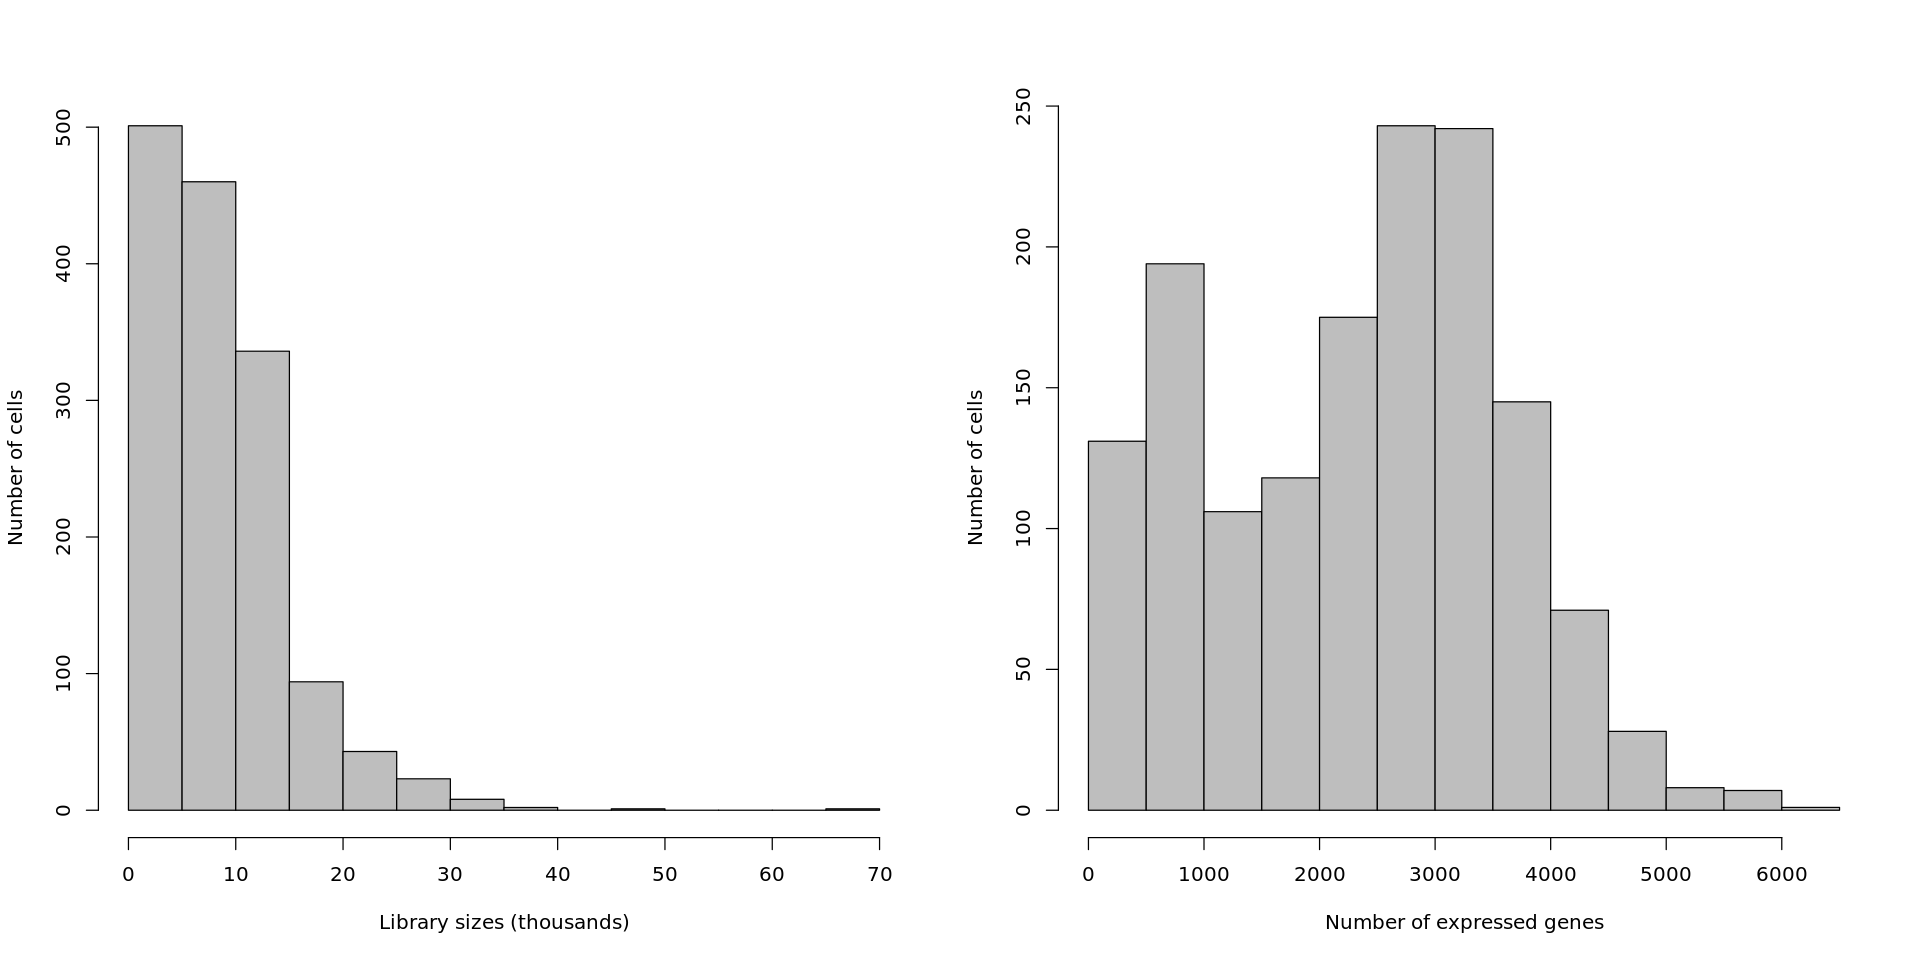

In [73]:
par(mfrow = c(1,2))
hist(E15.5$total_counts/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")
hist(E15.5$total_features_by_counts, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

options(repr.plot.width = 16, repr.plot.height = 8)

Selecting a threshold for these metrics is not straightforward as their absolute values depend on the protocol
and the biological system. For example, sequencing to greater depth will lead to more reads, regardless of
the quality of the cells. To obtain an adaptive threshold, we assume that most of the dataset consists of
high-quality cells. We remove cells with log-library sizes that deviate more than 3 absolute deviations from
the median (Lun et al. 2016, Davie et al., 2018). The log transformation is performed to improve resolution
at small values, which is especially necessary when the absolute deviation of the raw values is comparable to
or greater than the median.
Note: Davie et al. only flag a cell as an outlier when its 5 absolute deviations from the median.

In [31]:
libsize.drop_SynJ <- isOutlier(SynJ$total_counts, nmads = 3, type = "both", log = TRUE)
feature.drop_SynJ <- isOutlier(SynJ$total_features_by_counts, nmads = 3, type = "both", log = TRUE)

In [74]:
libsize.drop_E12.5 <- isOutlier(E12.5$total_counts, nmads = 3, type = "both", log = TRUE)
feature.drop_E12.5 <- isOutlier(E12.5$total_features_by_counts, nmads = 3, type = "both", log = TRUE)
libsize.drop_E13.5_left <- isOutlier(E13.5$total_counts, nmads = 3, type = "lower", log = TRUE)
libsize.drop_E13.5_right <- isOutlier(E13.5$total_counts, nmads = 3, type = "higher", log = TRUE)
feature.drop_E13.5_left <- isOutlier(E13.5$total_features_by_counts, nmads = 3, type = "lower", log = TRUE)
feature.drop_E13.5_right <- isOutlier(E13.5$total_features_by_counts, nmads = 3, type = "higher", log = TRUE)
libsize.drop_E14.5 <- isOutlier(E14.5$total_counts, nmads = 3, type = "both", log = TRUE)
feature.drop_E14.5 <- isOutlier(E14.5$total_features_by_counts, nmads = 3, type = "both", log = TRUE)
libsize.drop_E15.5 <- isOutlier(E15.5$total_counts, nmads = 3, type = "both", log = TRUE)
feature.drop_E15.5_left <- isOutlier(E15.5$total_features_by_counts, nmads = 3, type = "lower", log = TRUE)
feature.drop_E15.5_right <- isOutlier(E15.5$total_features_by_counts, nmads = 3, type = "higher", log = TRUE)

In [75]:
libsize.drop_E13.5_right

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [32]:
# libsize.drop cutoff values
a_SynJ <- (median(SynJ$total_counts) + 3*mad(SynJ$total_counts))/1e3
b_SynJ <- (median(SynJ$total_counts) - 3*mad(SynJ$total_counts))/1e3

# feature.drop cutoff values
c_SynJ <- median(SynJ$total_features_by_counts) + 3*mad(SynJ$total_features_by_counts)
d_SynJ <- median(SynJ$total_features_by_counts) - 3*mad(SynJ$total_features_by_counts)

In [76]:
# libsize.drop cutoff values
a_12.5 <- (median(E12.5$total_counts) + 3*mad(E12.5$total_counts))/1e3
b_12.5 <- (median(E12.5$total_counts) - 3*mad(E12.5$total_counts))/1e3

# feature.drop cutoff values
c_12.5 <- median(E12.5$total_features_by_counts) + 3*mad(E12.5$total_features_by_counts)
d_12.5 <- median(E12.5$total_features_by_counts) - 3*mad(E12.5$total_features_by_counts)

In [77]:
# libsize.drop cutoff values
a_13.5 <- (median(E13.5$total_counts) + 3*mad(E13.5$total_counts))/1e3
b_13.5 <- (median(E13.5$total_counts) - 3*mad(E13.5$total_counts))/1e3

# feature.drop cutoff values
c_13.5 <- median(E13.5$total_features_by_counts) + 3*mad(E13.5$total_features_by_counts)
d_13.5 <- median(E13.5$total_features_by_counts) - 3*mad(E13.5$total_features_by_counts)

In [78]:
# libsize.drop cutoff values
a_14.5 <- (median(E14.5$total_counts) + 3*mad(E14.5$total_counts))/1e3
b_14.5 <- (median(E14.5$total_counts) - 3*mad(E14.5$total_counts))/1e3

# feature.drop cutoff values
c_14.5 <- median(E14.5$total_features_by_counts) + 3*mad(E14.5$total_features_by_counts)
d_14.5 <- median(E14.5$total_features_by_counts) - 3*mad(E14.5$total_features_by_counts)

In [79]:
# libsize.drop cutoff values
a_15.5 <- (median(E15.5$total_counts) + 3*mad(E15.5$total_counts))/1e3
b_15.5 <- (median(E15.5$total_counts) - 3*mad(E15.5$total_counts))/1e3

# feature.drop cutoff values
c_15.5 <- median(E15.5$total_features_by_counts) + 3*mad(E15.5$total_features_by_counts)
d_15.5 <- median(E15.5$total_features_by_counts) - 3*mad(E15.5$total_features_by_counts)

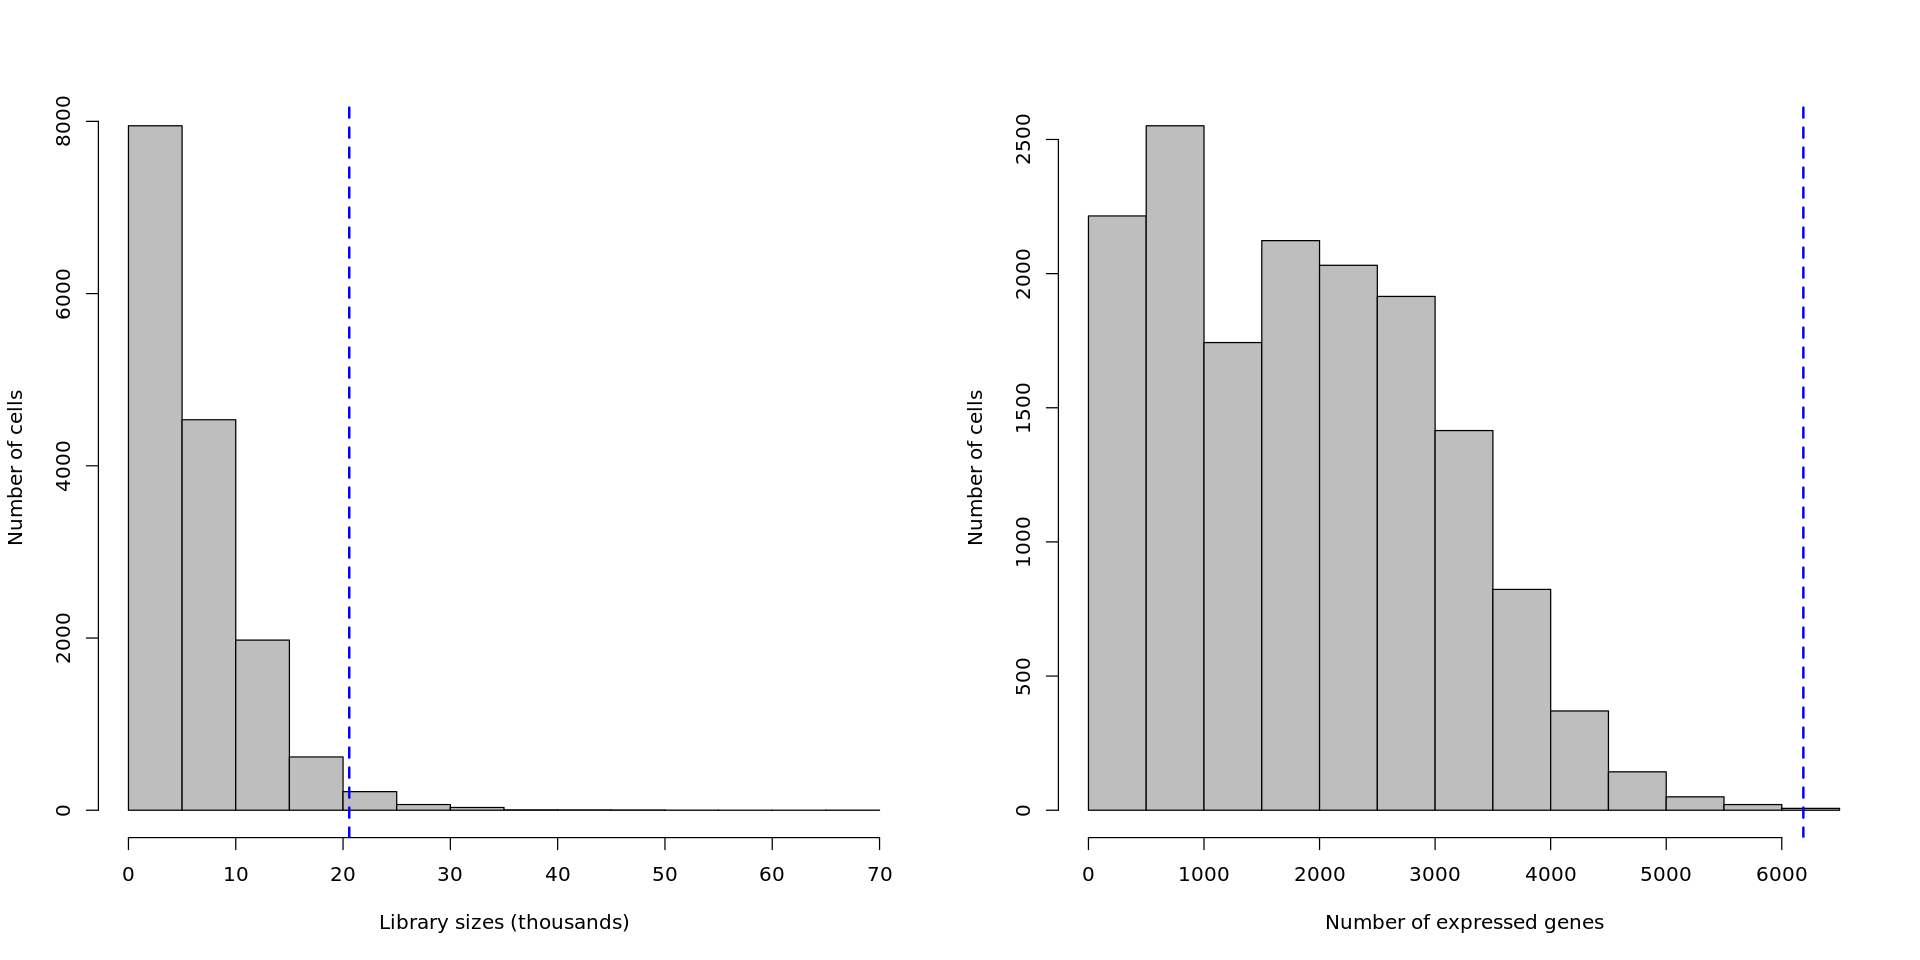

In [33]:
par(mfrow = c(1,2))
hist(SynJ$total_counts/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = a_SynJ, col = "blue", lwd = 2, lty = 2)
abline(v = b_SynJ, col = "blue", lwd = 2, lty = 2)

hist(SynJ$total_features_by_counts, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = c_SynJ, col = "blue", lwd = 2, lty = 2)
abline(v = d_SynJ, col = "blue", lwd = 2, lty = 2)

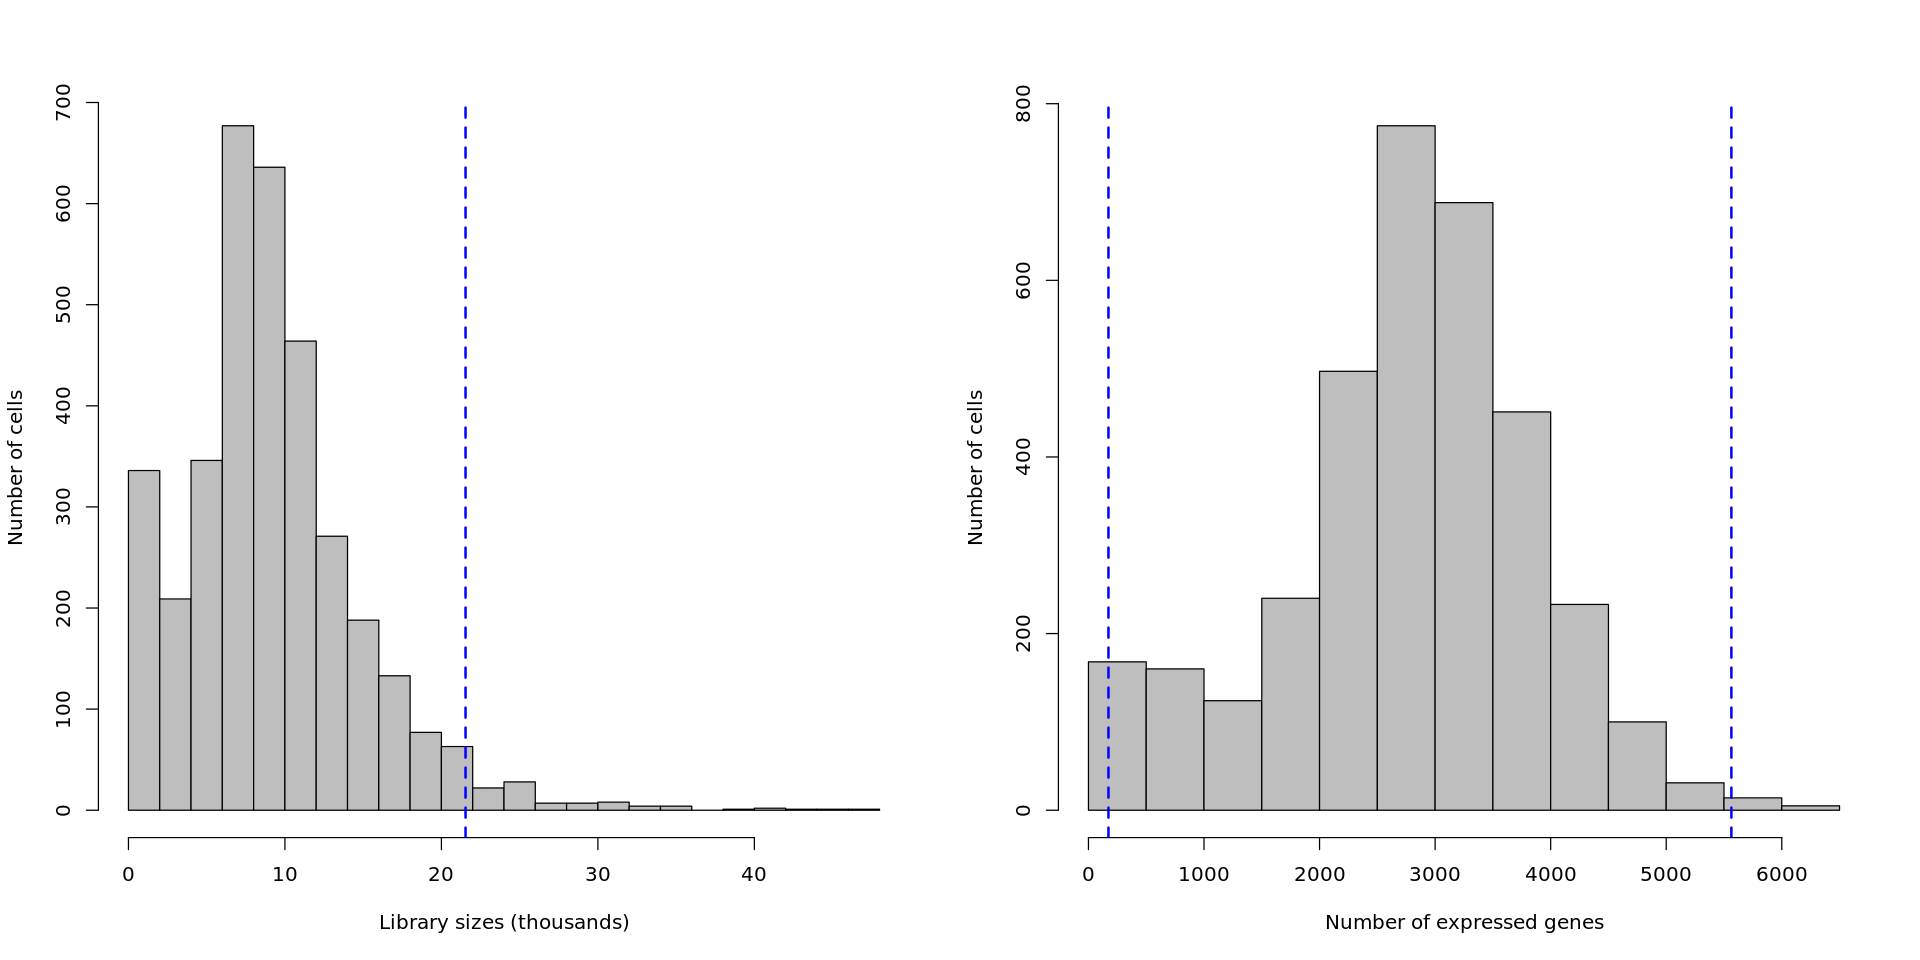

In [80]:
par(mfrow = c(1,2))
hist(E12.5$total_counts/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = a_12.5, col = "blue", lwd = 2, lty = 2)
abline(v = b_12.5, col = "blue", lwd = 2, lty = 2)

hist(E12.5$total_features_by_counts, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = c_12.5, col = "blue", lwd = 2, lty = 2)
abline(v = d_12.5, col = "blue", lwd = 2, lty = 2)

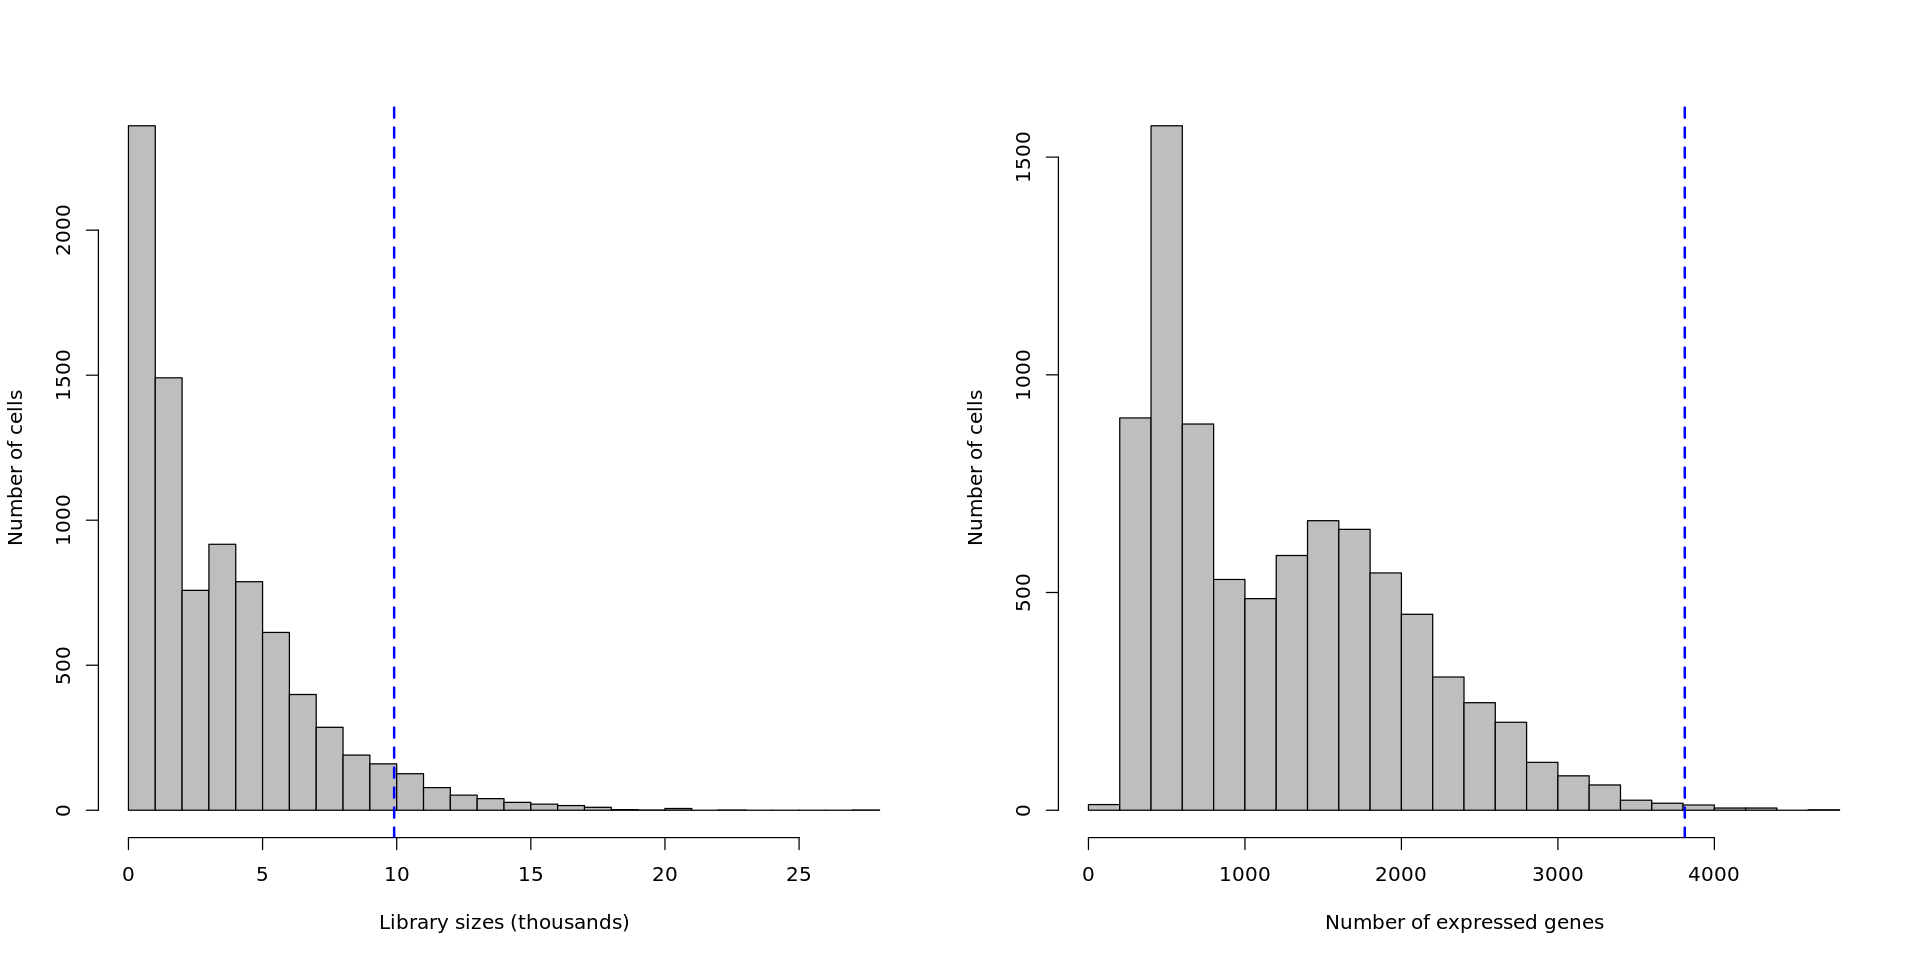

In [81]:
par(mfrow = c(1,2))
hist(E13.5$total_counts/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = a_13.5, col = "blue", lwd = 2, lty = 2)
abline(v = b_13.5, col = "blue", lwd = 2, lty = 2)

hist(E13.5$total_features_by_counts, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = c_13.5, col = "blue", lwd = 2, lty = 2)
abline(v = d_13.5, col = "blue", lwd = 2, lty = 2)

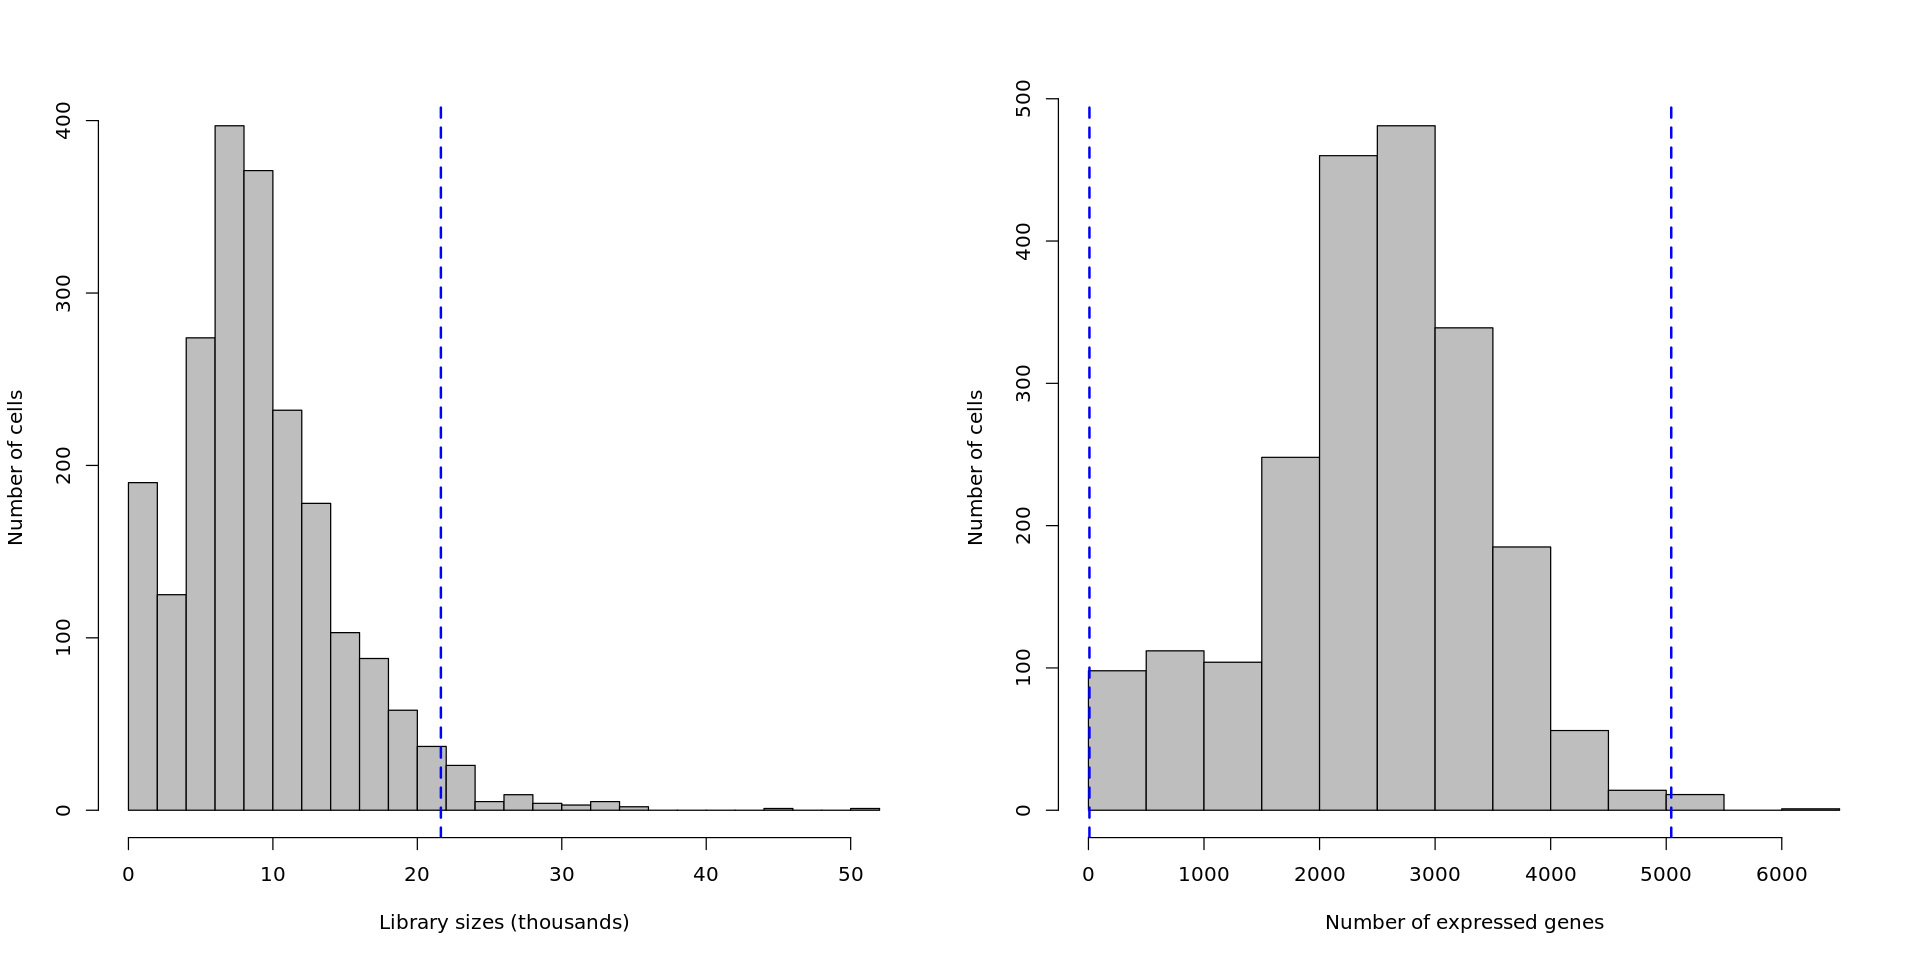

In [82]:
par(mfrow = c(1,2))
hist(E14.5$total_counts/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = a_14.5, col = "blue", lwd = 2, lty = 2)
abline(v = b_14.5, col = "blue", lwd = 2, lty = 2)

hist(E14.5$total_features_by_counts, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = c_14.5, col = "blue", lwd = 2, lty = 2)
abline(v = d_14.5, col = "blue", lwd = 2, lty = 2)

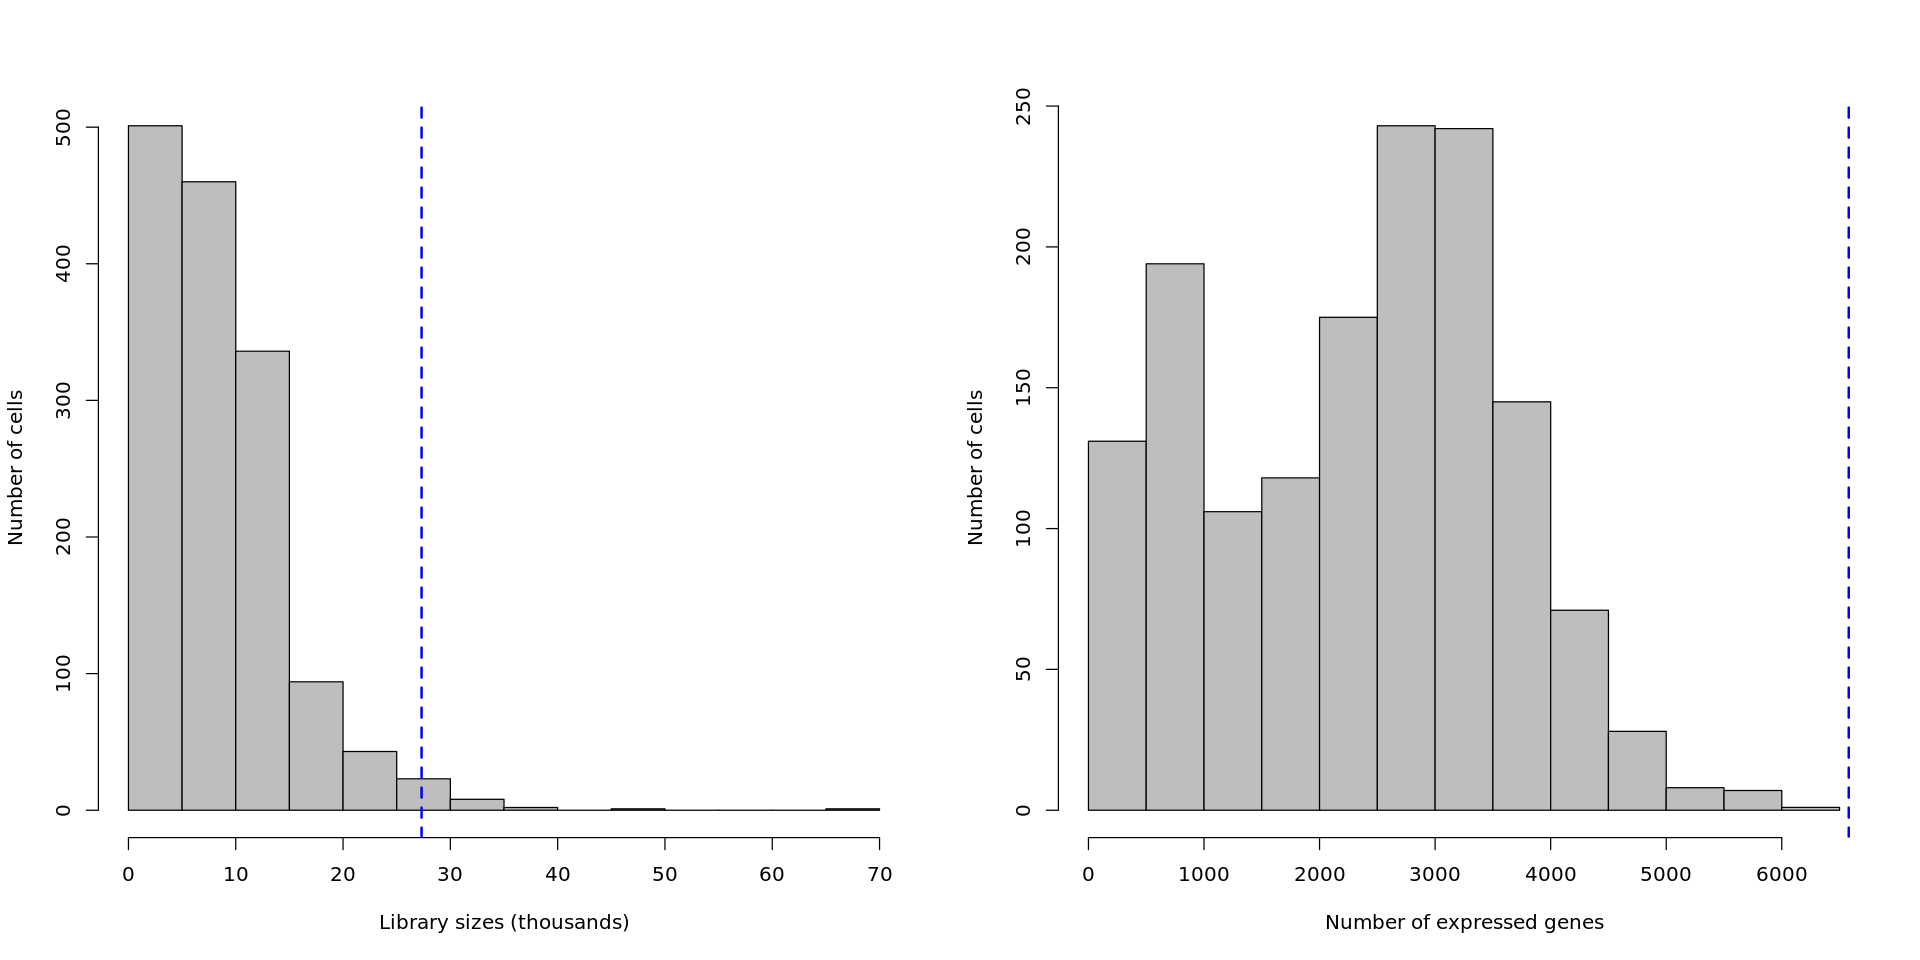

In [83]:
par(mfrow = c(1,2))
hist(E15.5$total_counts/1e3, xlab = "Library sizes (thousands)", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = a_15.5, col = "blue", lwd = 2, lty = 2)
abline(v = b_15.5, col = "blue", lwd = 2, lty = 2)

hist(E15.5$total_features_by_counts, xlab = "Number of expressed genes", main = "", breaks = 20,
     col = "grey", ylab = "Number of cells")

abline(v = c_15.5, col = "blue", lwd = 2, lty = 2)
abline(v = d_15.5, col = "blue", lwd = 2, lty = 2)

Another measure of quality is the proportion of reads mapped to genes in the mitochondrial genome. High
proportions are indicative of poor quality cells (Ilicic et al., 2016), possibly because of increased apoptosis
and/or loss of cytoplasmic RNA from lysed cells. In addition, a high proportion of mitochondrial reads could
reflect an inefficient capture of the RNA when creating the library.
By assuming most cells in the dataset are of high quality, the threshold to remove cells with too high
mitochondrial proportions can be set to remove any large outliers. For this, the median absolute deviation
method is used again.

In [34]:
mito.drop_SynJ <- isOutlier(SynJ$pct_counts_Mt, nmads = 3, type = "higher")

In [84]:
mito.drop_E12.5 <- isOutlier(E12.5$pct_counts_Mt, nmads = 3, type = "higher")

In [85]:
mito.drop_E13.5 <- isOutlier(E13.5$pct_counts_Mt, nmads = 3, type = "higher")

In [86]:
mito.drop_E14.5 <- isOutlier(E14.5$pct_counts_Mt, nmads = 3, type = "higher")

In [87]:
mito.drop_E15.5 <- isOutlier(E15.5$pct_counts_Mt, nmads = 3, type = "higher")

In [35]:
# mito.drop cutoff value
a_SynJ <- (median(SynJ$pct_counts_Mt) + 3*mad(SynJ$pct_counts_Mt))
a_12.5 <- (median(E12.5$pct_counts_Mt) + 3*mad(E12.5$pct_counts_Mt))
a_13.5 <- (median(E13.5$pct_counts_Mt) + 3*mad(E13.5$pct_counts_Mt))
a_14.5 <- (median(E14.5$pct_counts_Mt) + 3*mad(E14.5$pct_counts_Mt))
a_15.5 <- (median(E15.5$pct_counts_Mt) + 3*mad(E15.5$pct_counts_Mt))

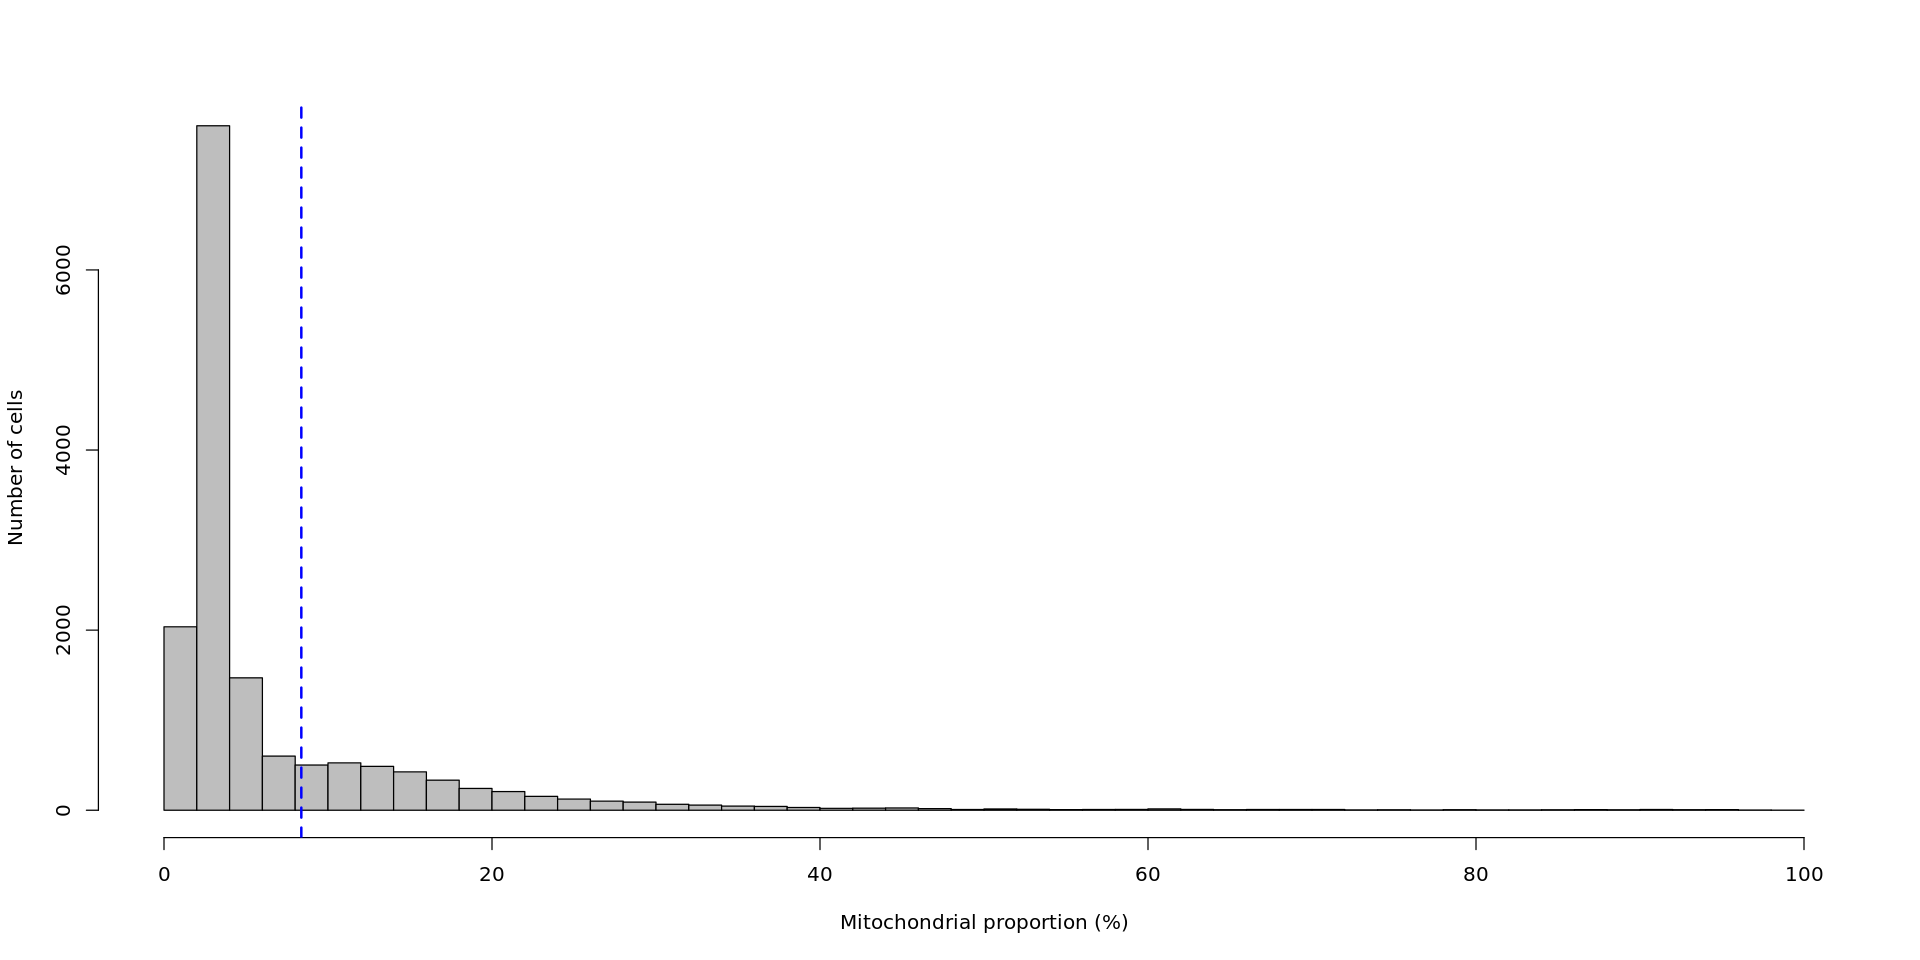

In [36]:
hist(SynJ$pct_counts_Mt, xlab = "Mitochondrial proportion (%)",
                        ylab = "Number of cells",
                        breaks = 40, main = "", col = "grey")

abline(v = a_SynJ, col = "blue", lwd = 2, lty = 2)

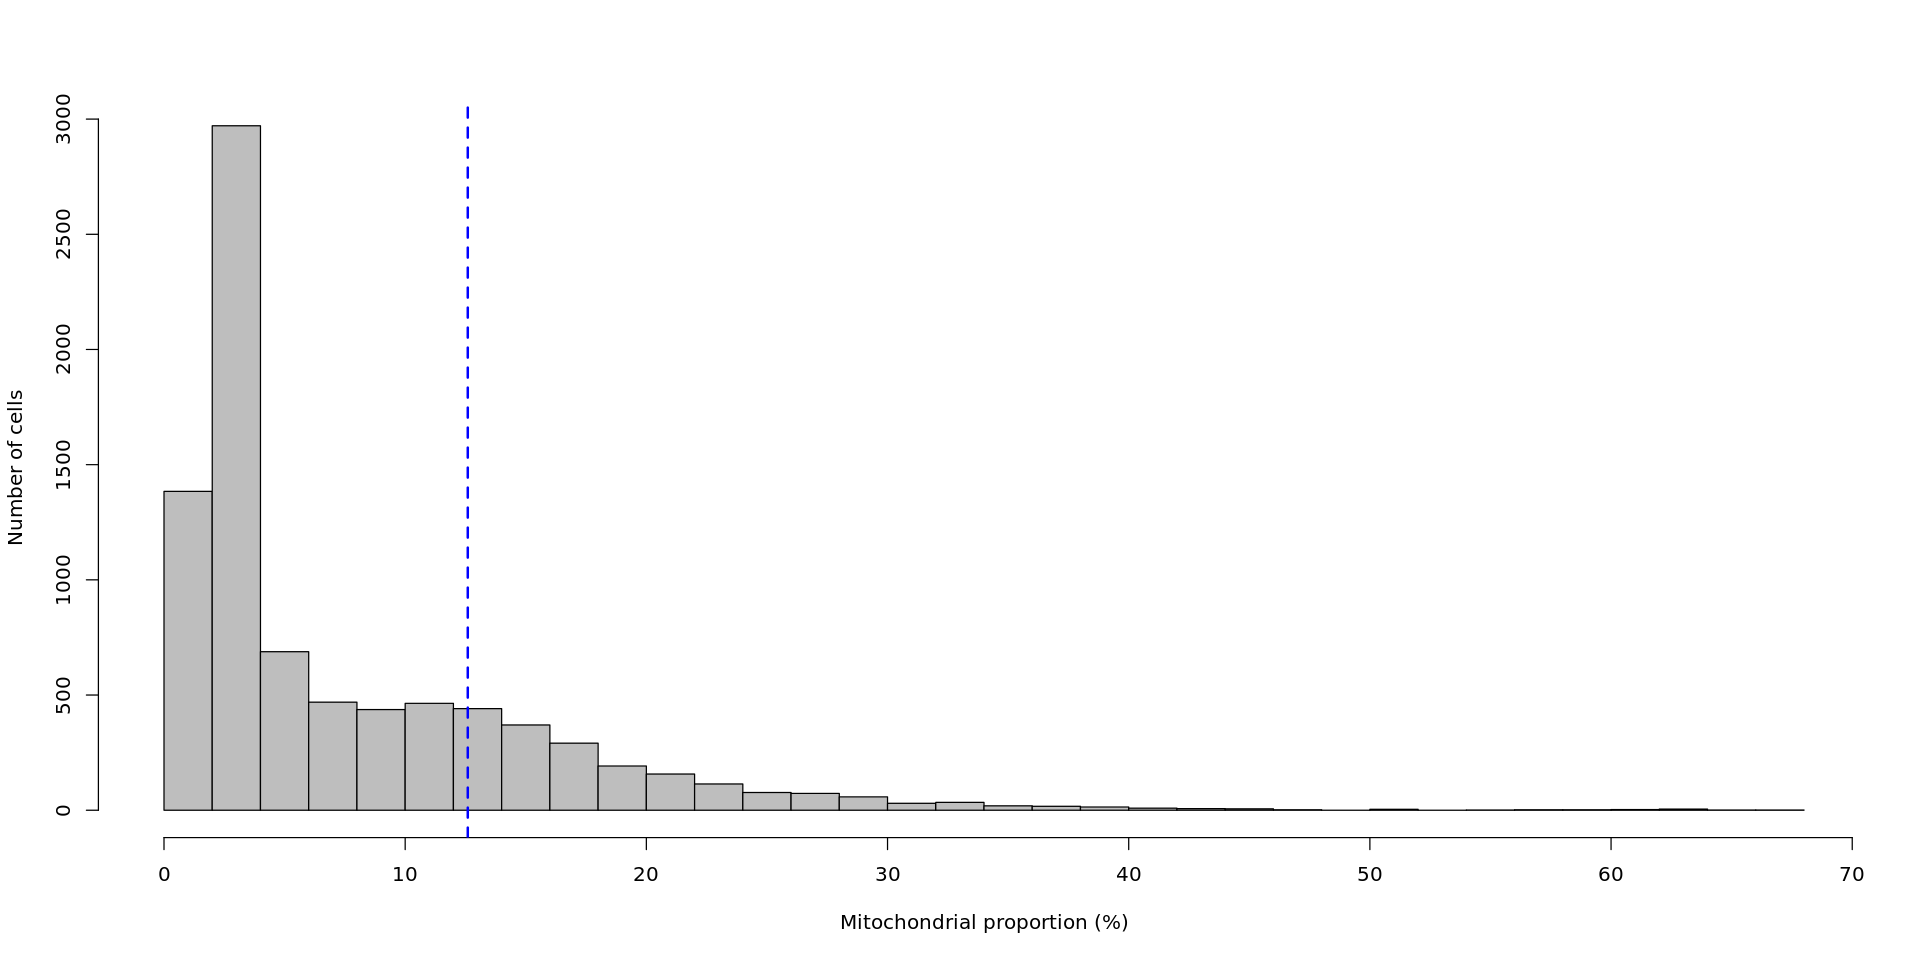

In [89]:
hist(E13.5$pct_counts_Mt, xlab = "Mitochondrial proportion (%)",
                        ylab = "Number of cells",
                        breaks = 40, main = "", col = "grey")

abline(v = a_13.5, col = "blue", lwd = 2, lty = 2)

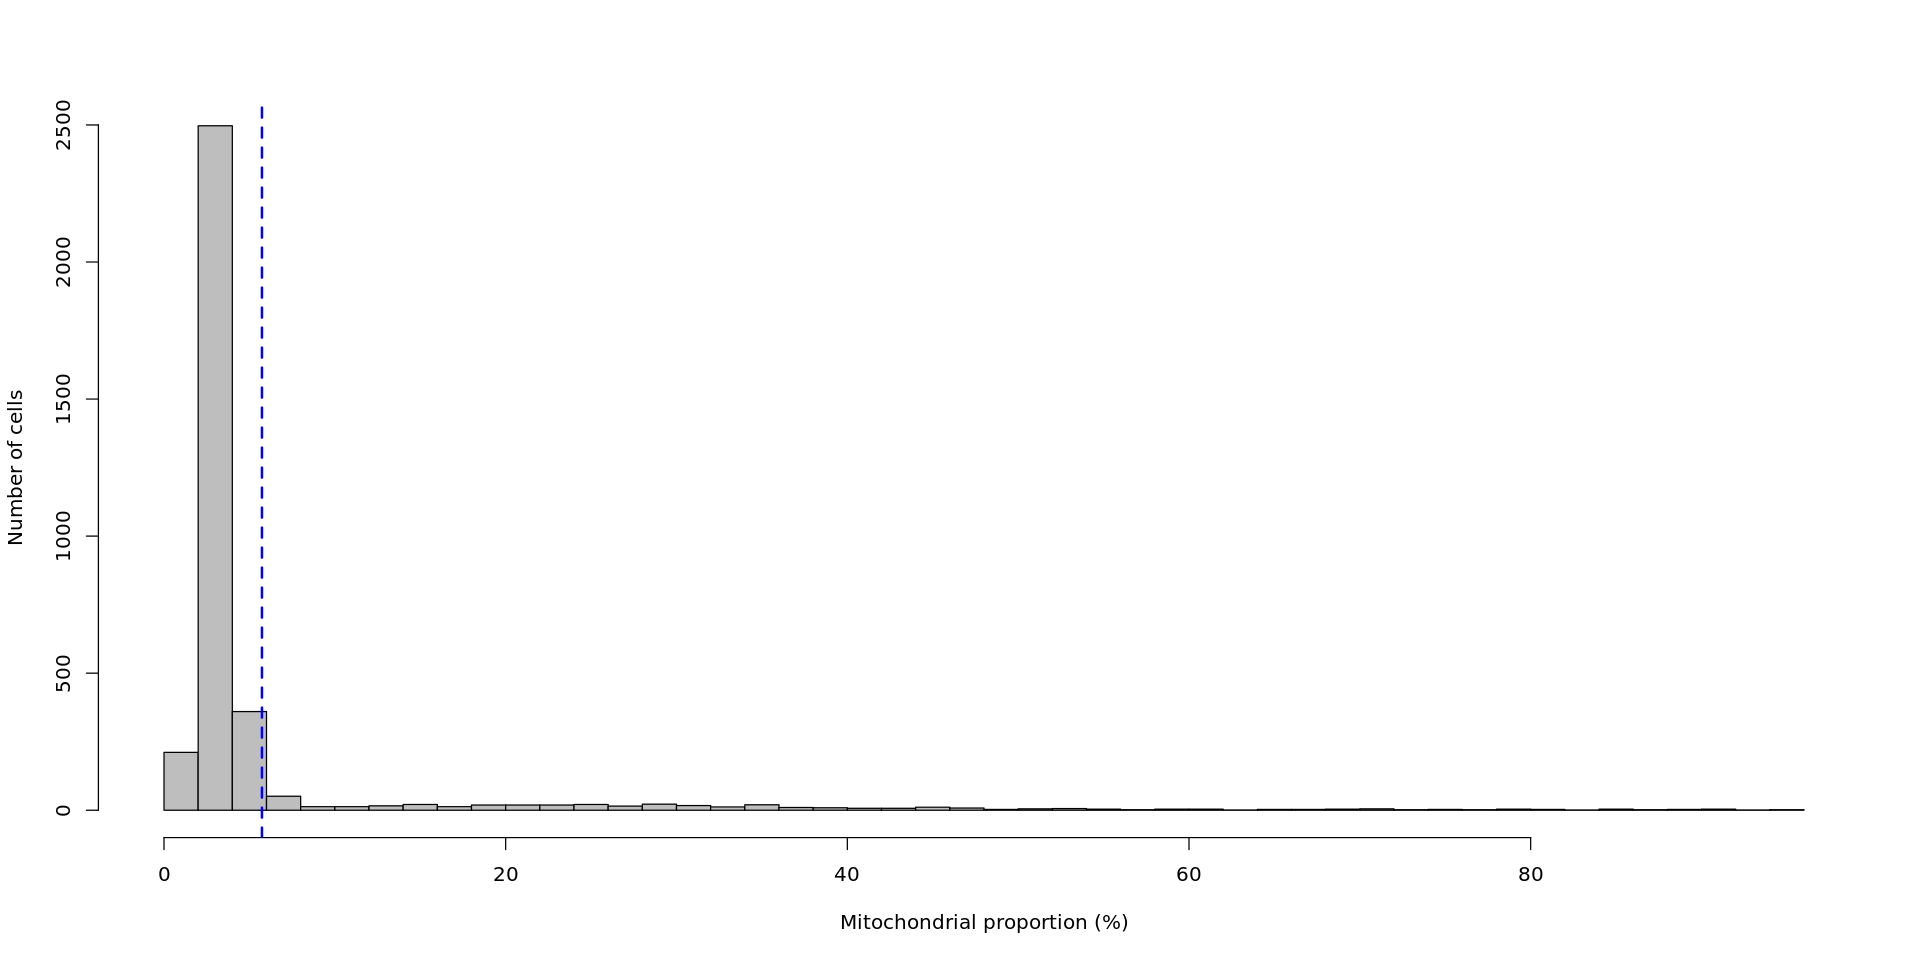

In [90]:
hist(E12.5$pct_counts_Mt, xlab = "Mitochondrial proportion (%)",
                        ylab = "Number of cells",
                        breaks = 40, main = "", col = "grey")

abline(v = a_12.5, col = "blue", lwd = 2, lty = 2)

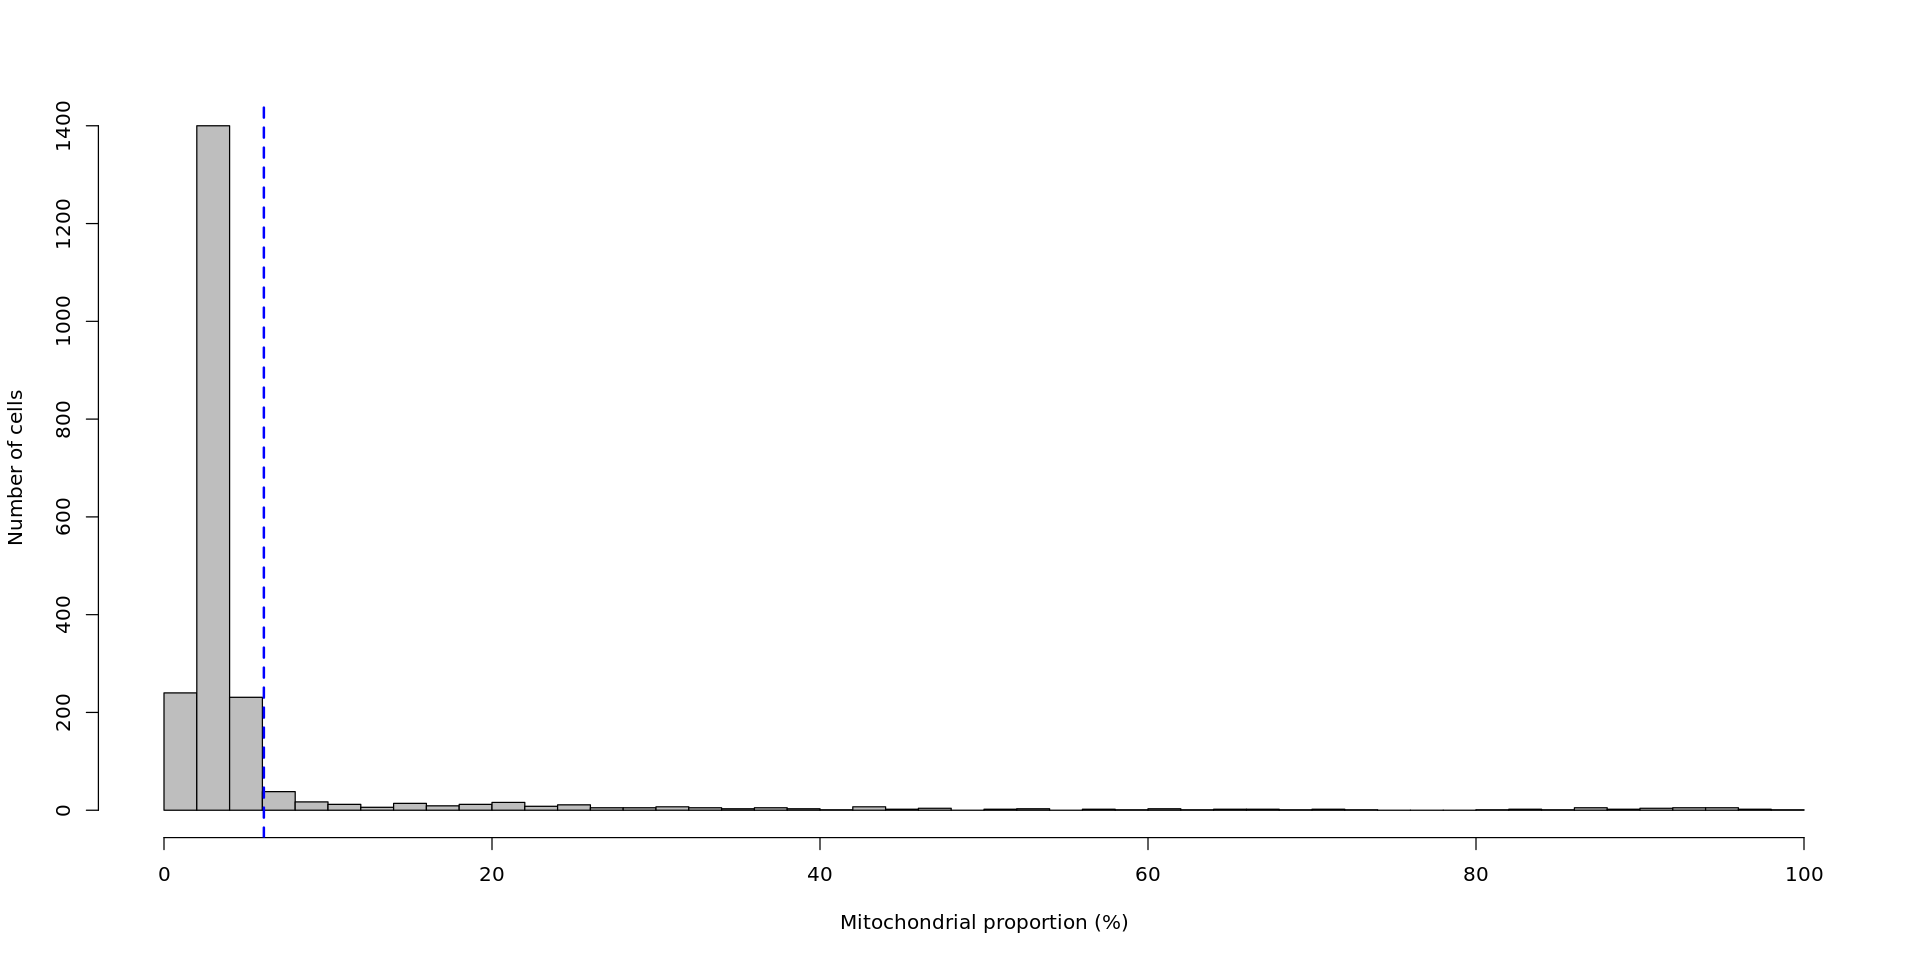

In [91]:
hist(E14.5$pct_counts_Mt, xlab = "Mitochondrial proportion (%)",
                        ylab = "Number of cells",
                        breaks = 40, main = "", col = "grey")

abline(v = a_14.5, col = "blue", lwd = 2, lty = 2)

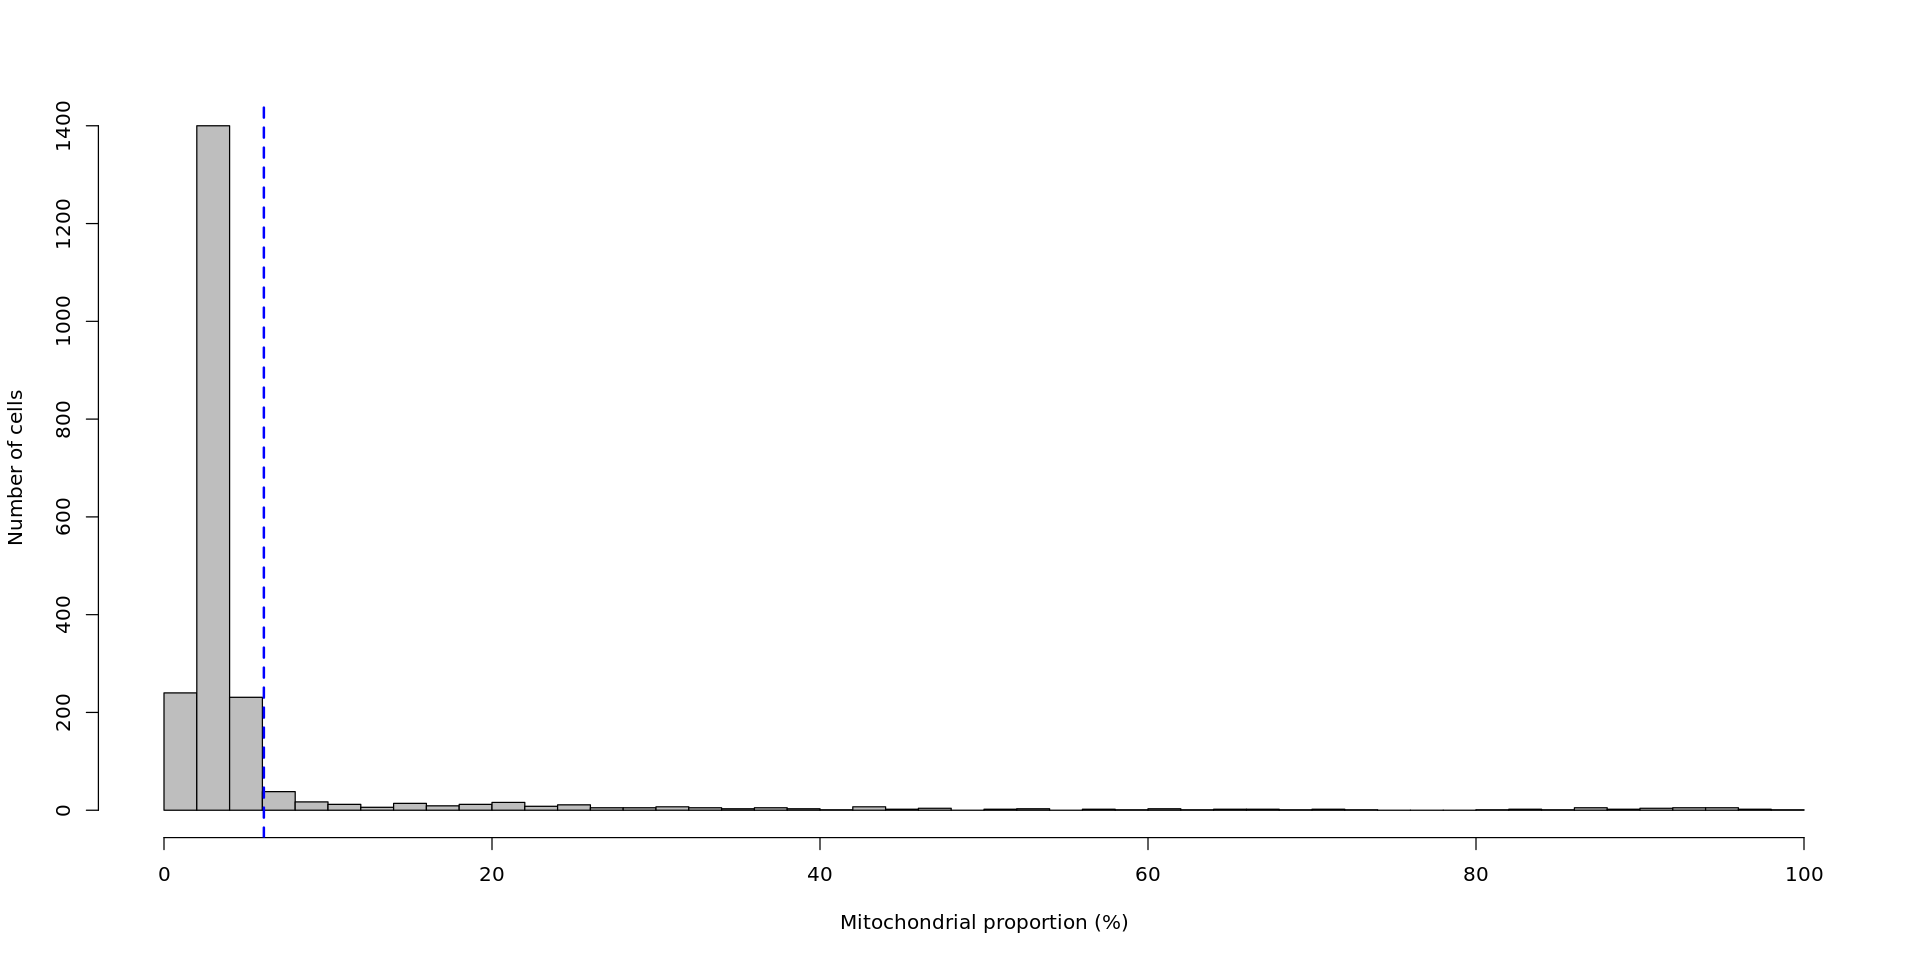

In [92]:
hist(E14.5$pct_counts_Mt, xlab = "Mitochondrial proportion (%)",
                        ylab = "Number of cells",
                        breaks = 40, main = "", col = "grey")

abline(v = a_14.5, col = "blue", lwd = 2, lty = 2)

Subset by column to retain only high-quality cells that pass all filters.

In [37]:
SynJ.qc <- SynJ[,!(libsize.drop_SynJ | feature.drop_SynJ | mito.drop_SynJ)]
data.frame(ByLibrarySize = sum(libsize.drop_SynJ), ByFeature = sum(feature.drop_SynJ), ByMito = sum(mito.drop_SynJ),
           Remaining = ncol(SynJ.qc))

ByLibrarySize,ByFeature,ByMito,Remaining
<int>,<int>,<int>,<int>
0,85,3601,11793


In [93]:
E12.5.qc <- E12.5[,!(libsize.drop_E12.5 | feature.drop_E12.5 | mito.drop_E12.5)]
data.frame(ByLibrarySize = sum(libsize.drop_E12.5), ByFeature = sum(feature.drop_E12.5), ByMito = sum(mito.drop_E12.5),
           Remaining = ncol(E12.5.qc))

ByLibrarySize,ByFeature,ByMito,Remaining
<int>,<int>,<int>,<int>
329,343,429,3033


In [94]:
E13.5.qc <- E13.5[,!(libsize.drop_E13.5_left | libsize.drop_E13.5_right | feature.drop_E13.5_left | feature.drop_E13.5_right | mito.drop_E13.5)]
data.frame(ByLibrarySize = sum(libsize.drop_E13.5_left, libsize.drop_E13.5_right), ByFeature = sum(feature.drop_E13.5_left, feature.drop_E13.5_right), ByMito = sum(mito.drop_E13.5),
           Remaining = ncol(E13.5.qc))

ByLibrarySize,ByFeature,ByMito,Remaining
<int>,<int>,<int>,<int>
0,0,1806,6537


In [95]:
E14.5.qc <- E14.5[,!(libsize.drop_E14.5 | feature.drop_E14.5 | mito.drop_E14.5)]
data.frame(ByLibrarySize = sum(libsize.drop_E14.5), ByFeature = sum(feature.drop_E14.5), ByMito = sum(mito.drop_E14.5),
           Remaining = ncol(E14.5.qc))

ByLibrarySize,ByFeature,ByMito,Remaining
<int>,<int>,<int>,<int>
159,193,235,1839


In [96]:
E15.5.qc <- E15.5[,!(libsize.drop_E15.5 | feature.drop_E15.5_left | feature.drop_E15.5_right | mito.drop_E15.5)]
data.frame(ByLibrarySize = sum(libsize.drop_E15.5), ByFeature = sum(feature.drop_E15.5_left, feature.drop_E15.5_right), ByMito = sum(mito.drop_E15.5),
           Remaining = ncol(E15.5.qc))

ByLibrarySize,ByFeature,ByMito,Remaining
<int>,<int>,<int>,<int>
74,158,296,1123


105 cells were rejected based on the library size criterion, 131 were removed based on very low or high gene expression counts. 93 more are removed for having a higher than expected proportion of mitochondrial reads, leading to a final total of 2490 cells.

An alternative approach to perform quality control is to perfom a PCA based on the quality metrics for
each cell, e.g., the total number of reads, the total number of features and the proportion of mitochondrial
reads. Outliers on a PCA plot may be indicative of low-quality cells that have aberrant technical properties
compared to the majority of high-quality cells.

Warning message:
“'variables' must now be explicitly specified”
Warning message:
“'variables' must now be explicitly specified”


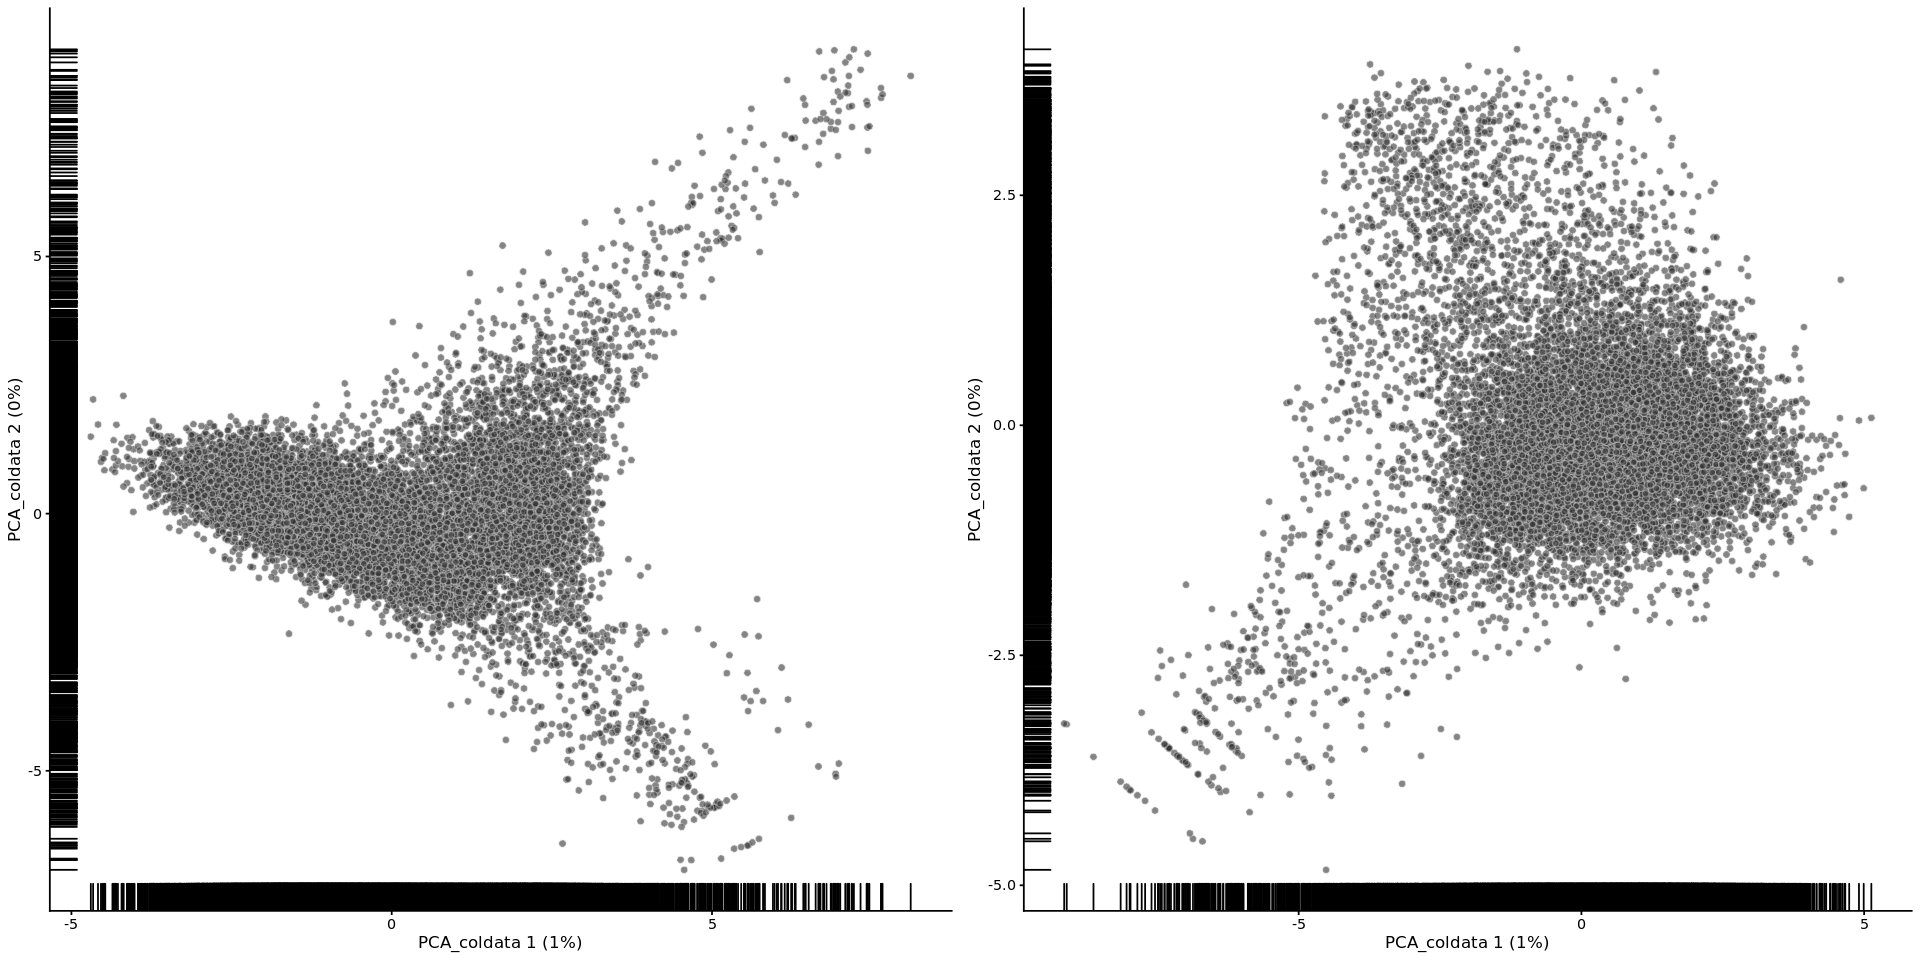

In [38]:
SynJ <- runColDataPCA(SynJ, outliers = TRUE)
SynJ.qc <- runColDataPCA(SynJ.qc, outliers = TRUE)

PCA.plot1 <- plotReducedDim(SynJ, dimred = "PCA_coldata") + geom_rug()
PCA.plot2 <- plotReducedDim(SynJ.qc, dimred = "PCA_coldata") + geom_rug()

plot_grid(PCA.plot1, PCA.plot2)

Warning message:
“'variables' must now be explicitly specified”
Warning message:
“'variables' must now be explicitly specified”


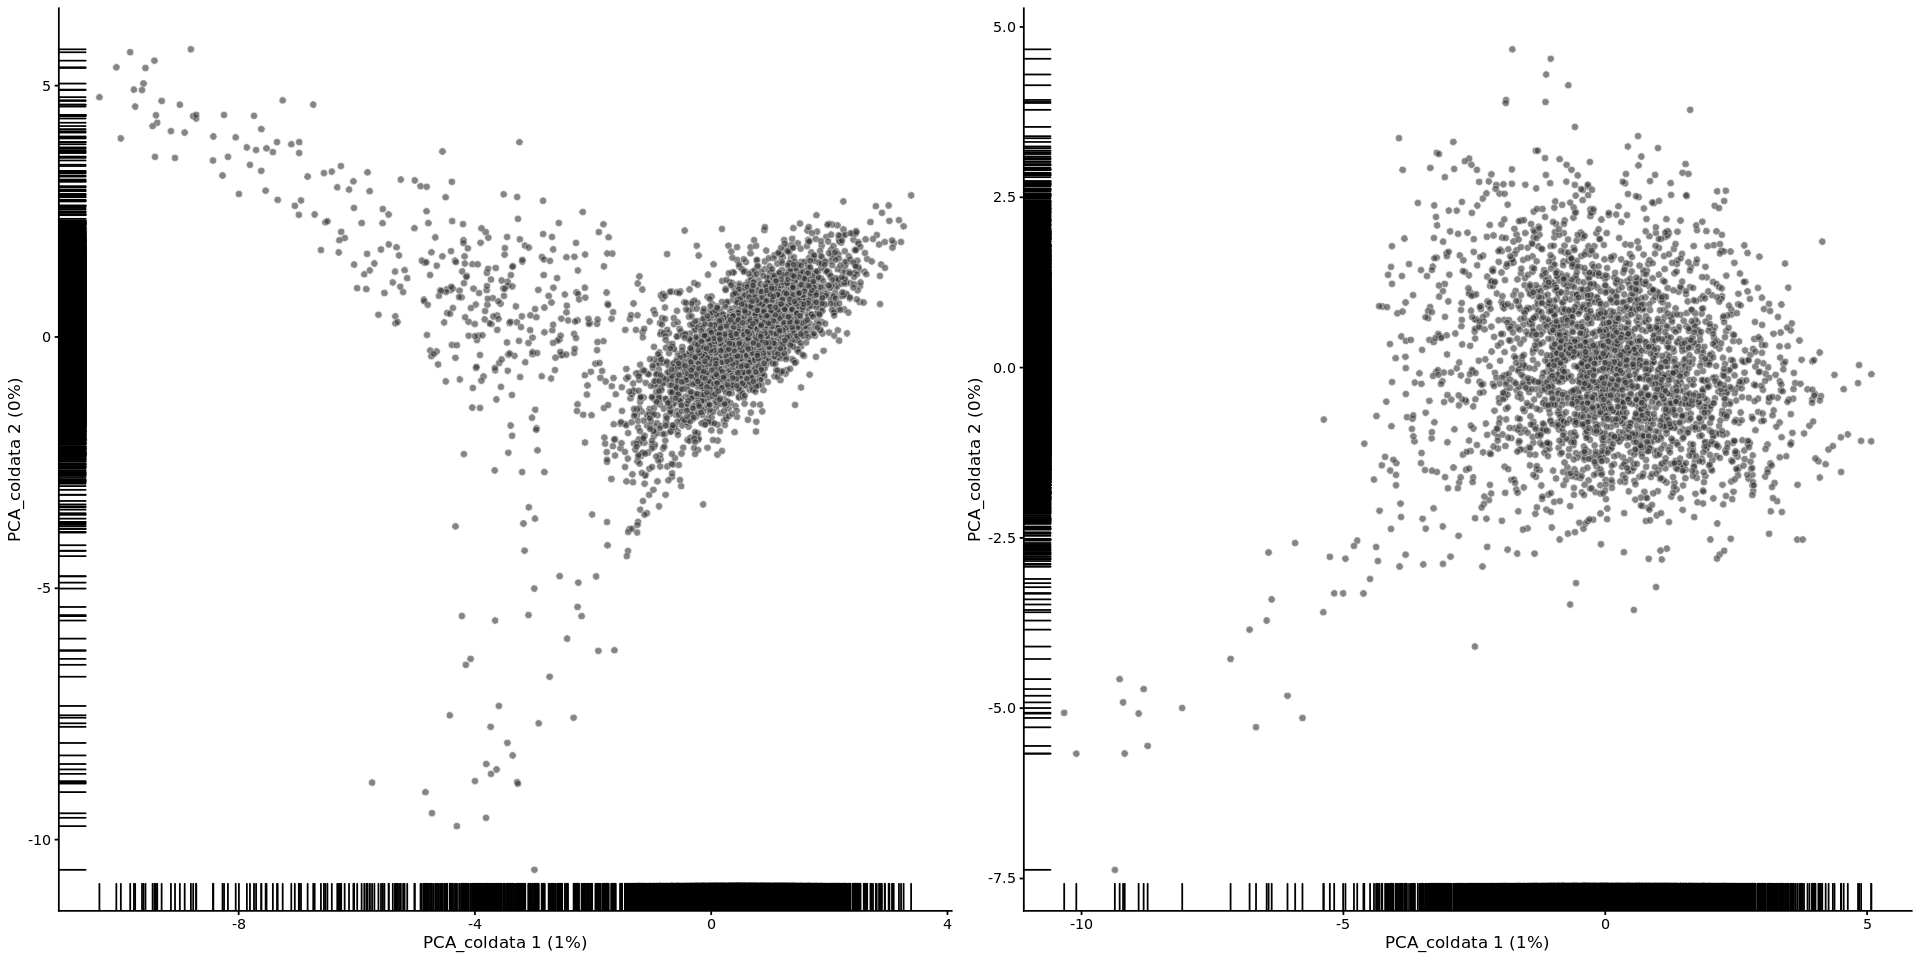

In [97]:
E12.5 <- runColDataPCA(E12.5, outliers = TRUE)
E12.5.qc <- runColDataPCA(E12.5.qc, outliers = TRUE)

PCA.plot1 <- plotReducedDim(E12.5, dimred = "PCA_coldata") + geom_rug()
PCA.plot2 <- plotReducedDim(E12.5.qc, dimred = "PCA_coldata") + geom_rug()

plot_grid(PCA.plot1, PCA.plot2)

Warning message:
“'variables' must now be explicitly specified”
Warning message:
“'variables' must now be explicitly specified”


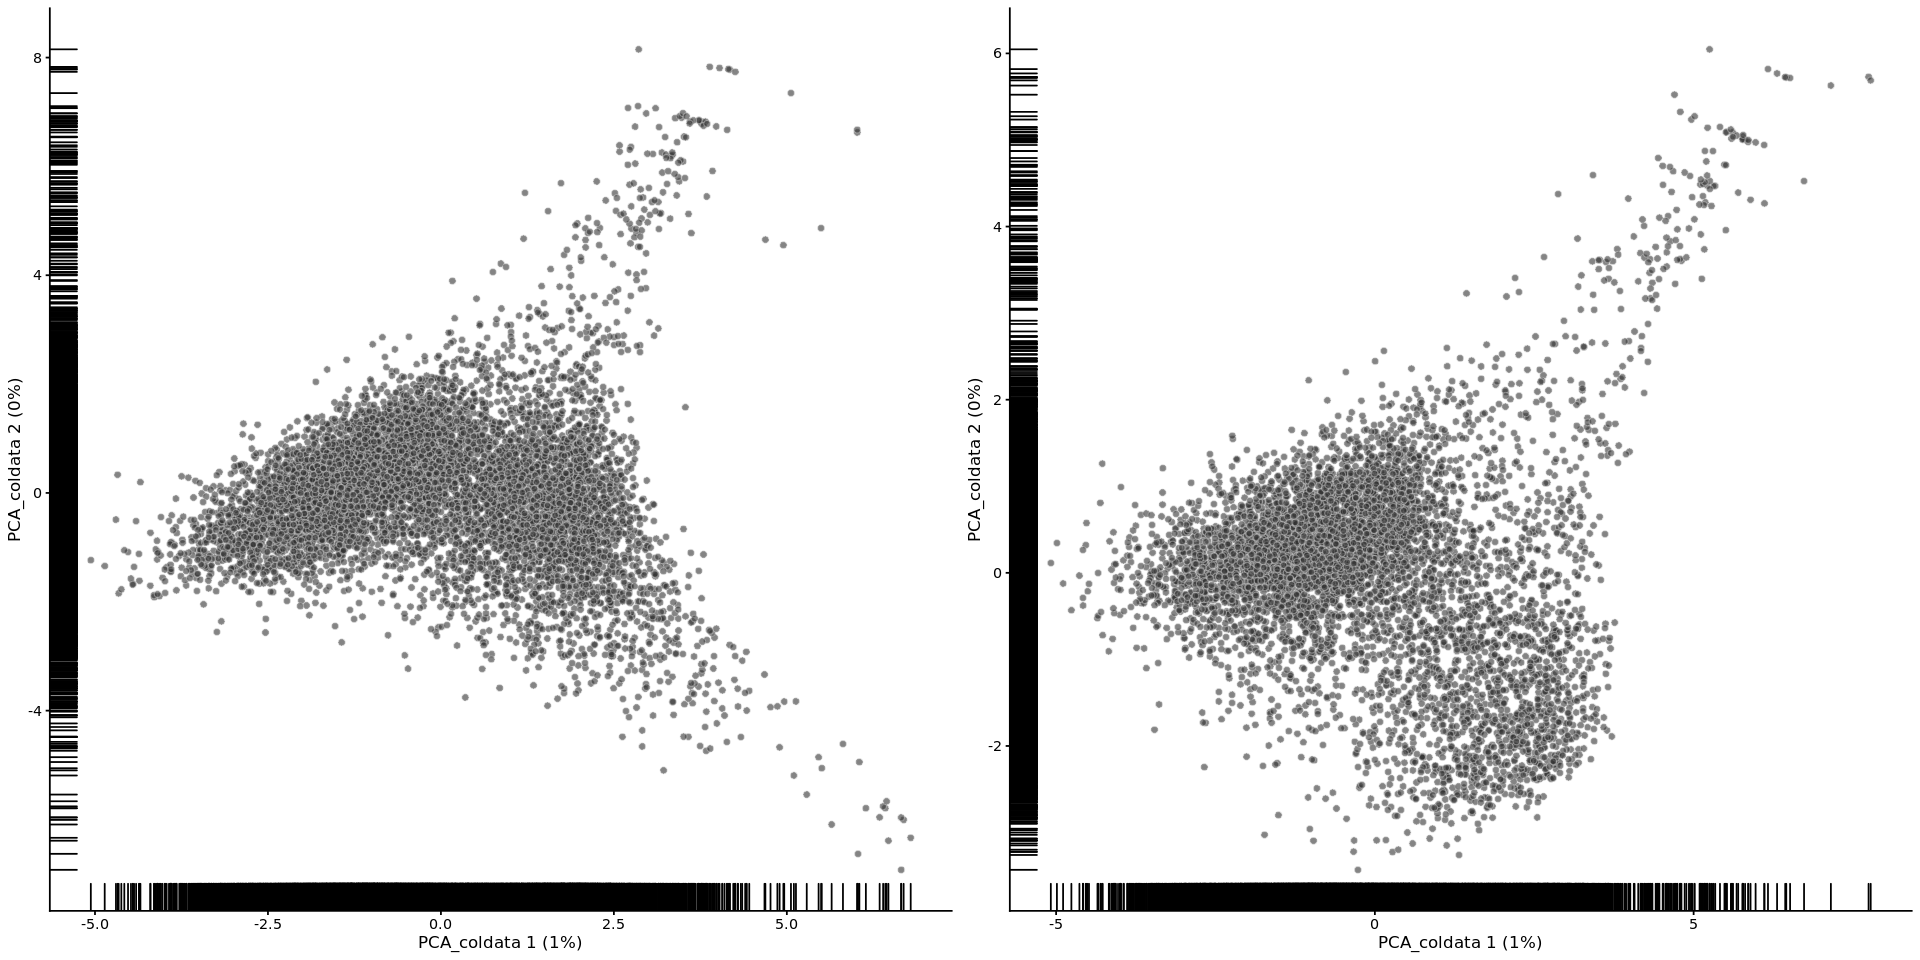

In [98]:
E13.5 <- runColDataPCA(E13.5, outliers = TRUE)
E13.5.qc <- runColDataPCA(E13.5.qc, outliers = TRUE)

PCA.plot1 <- plotReducedDim(E13.5, dimred = "PCA_coldata") + geom_rug()
PCA.plot2 <- plotReducedDim(E13.5.qc, dimred = "PCA_coldata") + geom_rug()

plot_grid(PCA.plot1, PCA.plot2)

Warning message:
“'variables' must now be explicitly specified”
Warning message:
“'variables' must now be explicitly specified”


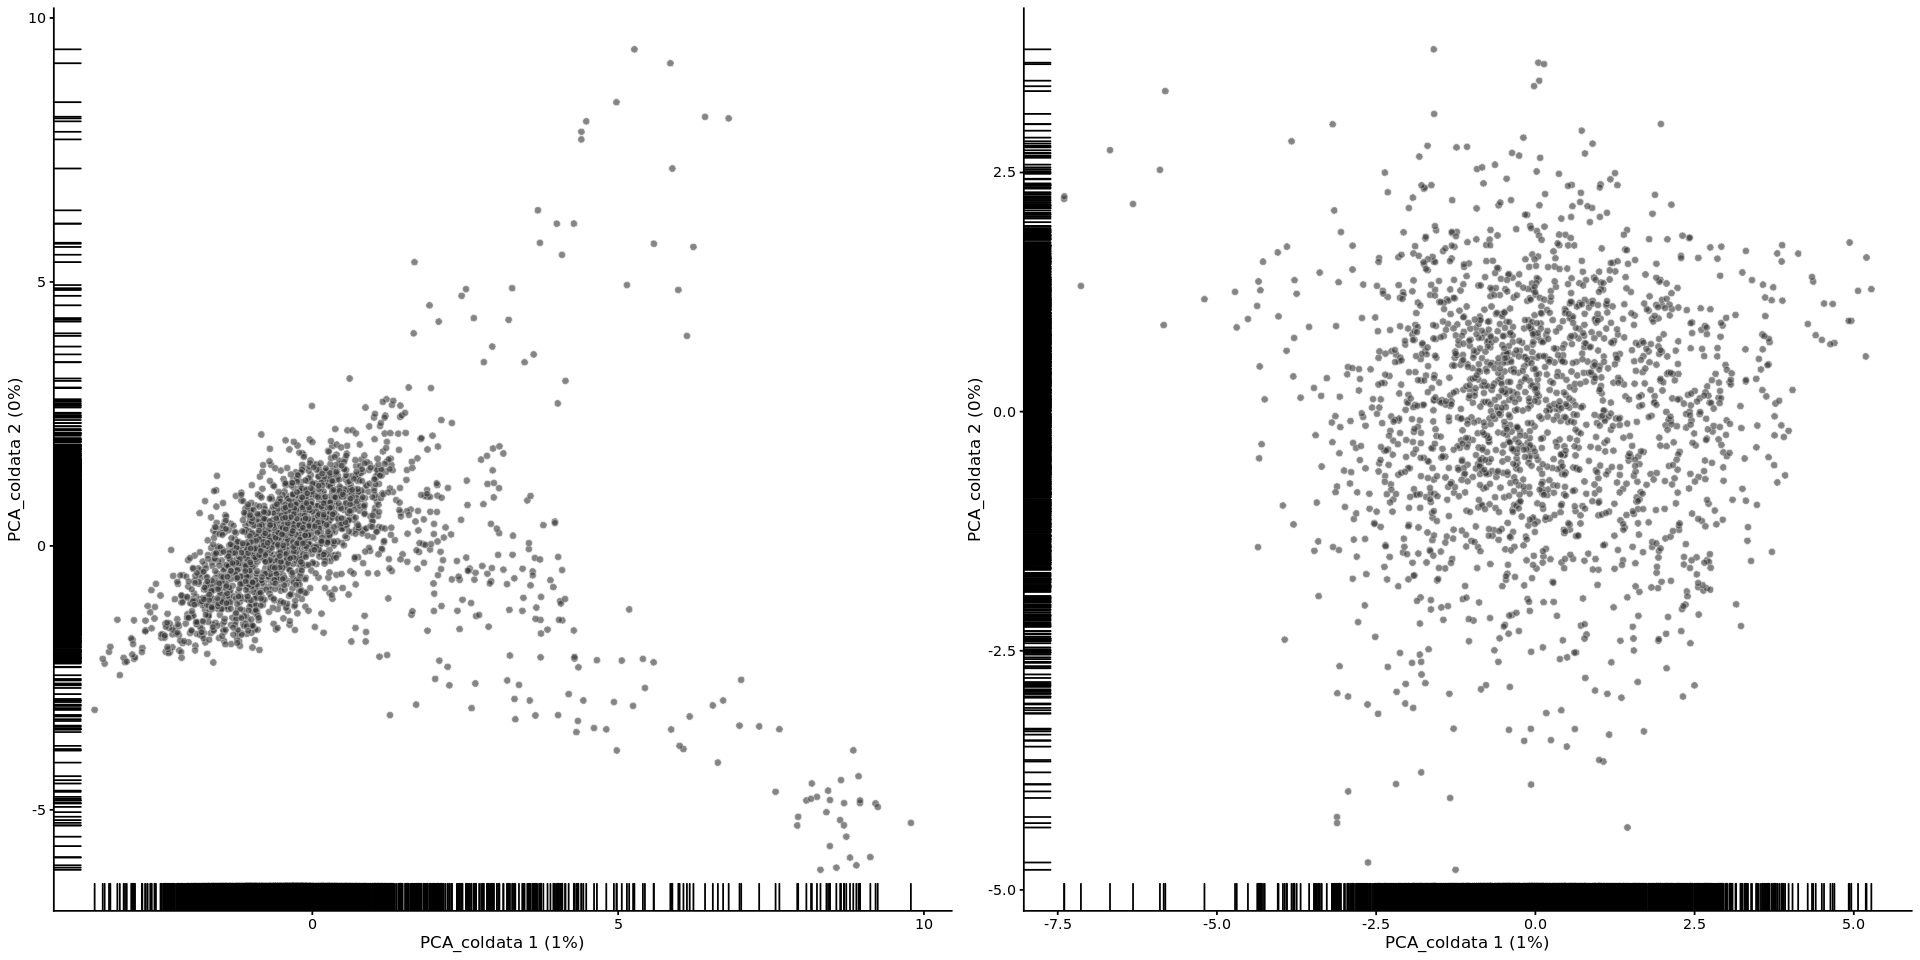

In [99]:
E14.5 <- runColDataPCA(E14.5, outliers = TRUE)
E14.5.qc <- runColDataPCA(E14.5.qc, outliers = TRUE)

PCA.plot1 <- plotReducedDim(E14.5, dimred = "PCA_coldata") + geom_rug()
PCA.plot2 <- plotReducedDim(E14.5.qc, dimred = "PCA_coldata") + geom_rug()

plot_grid(PCA.plot1, PCA.plot2)

Warning message:
“'variables' must now be explicitly specified”
Warning message:
“'variables' must now be explicitly specified”


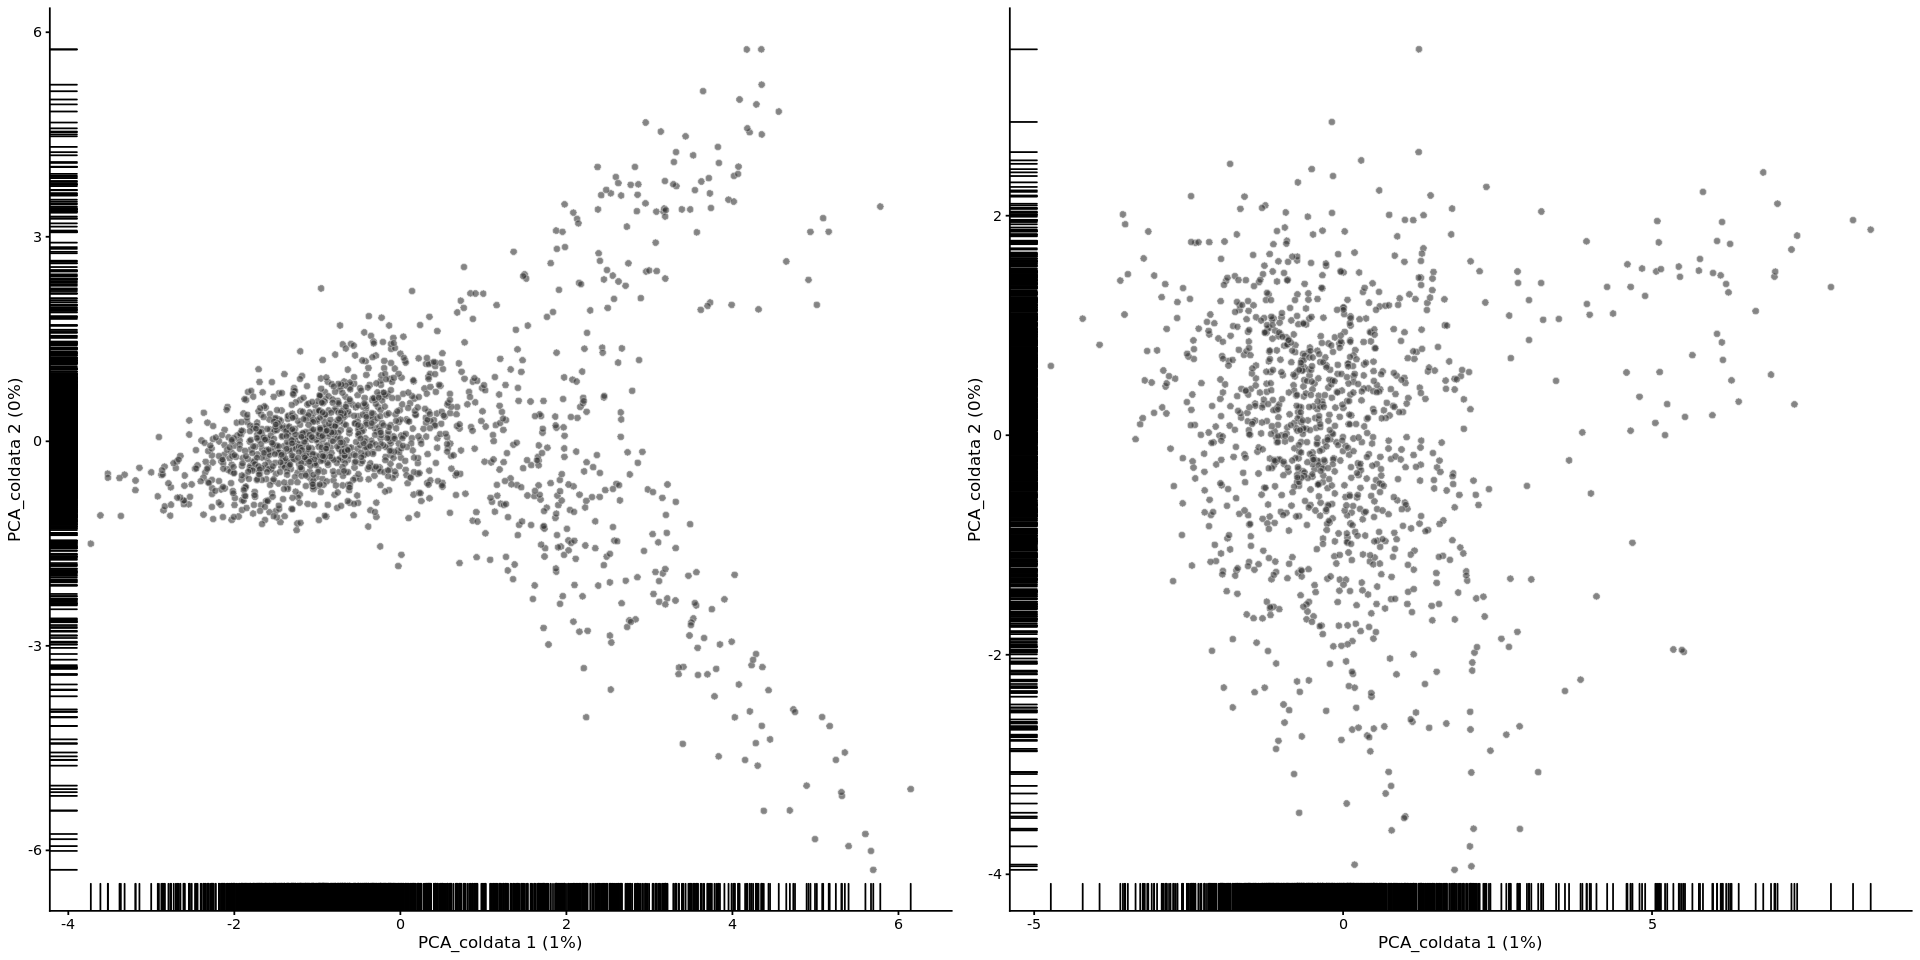

In [100]:
E15.5 <- runColDataPCA(E15.5, outliers = TRUE)
E15.5.qc <- runColDataPCA(E15.5.qc, outliers = TRUE)

PCA.plot1 <- plotReducedDim(E15.5, dimred = "PCA_coldata") + geom_rug()
PCA.plot2 <- plotReducedDim(E15.5.qc, dimred = "PCA_coldata") + geom_rug()

plot_grid(PCA.plot1, PCA.plot2)

### Filtering out low-abundance genes

Low-abundance genes are problematic as zero or near-zero counts do not contain enough information for
reliable statsitical inference. Here, low-abundance genes are defined as those with an average count below a
filter threshold of 0.001 (Davie et al., 2018). Removal of these genes mitigates discreteness and reduces the
amount of computational work without major (if any) loss of information.

In [39]:
average.counts_SynJ <- calculateAverage(SynJ.qc, exprs_values = "counts",
                                   subset_row = NULL)
genes.to.keep_SynJ <- average.counts_SynJ >= 0.001
sum(genes.to.keep_SynJ)

[1] 16689

In [101]:
average.counts_12.5 <- calculateAverage(E12.5.qc, exprs_values = "counts",
                                   subset_row = NULL)
genes.to.keep_12.5 <- average.counts_12.5 >= 0.001
sum(genes.to.keep_12.5)
average.counts_13.5 <- calculateAverage(E13.5.qc, exprs_values = "counts",
                                   subset_row = NULL)
genes.to.keep_13.5 <- average.counts_13.5 >= 0.001
sum(genes.to.keep_13.5)
average.counts_14.5 <- calculateAverage(E14.5.qc, exprs_values = "counts",
                                   subset_row = NULL)
genes.to.keep_14.5 <- average.counts_14.5 >= 0.001
sum(genes.to.keep_14.5)
average.counts_15.5 <- calculateAverage(E15.5.qc, exprs_values = "counts",
                                   subset_row = NULL)
genes.to.keep_15.5 <- average.counts_15.5 >= 0.001
sum(genes.to.keep_15.5)

[1] 16754

[1] 15544

[1] 16778

[1] 16992

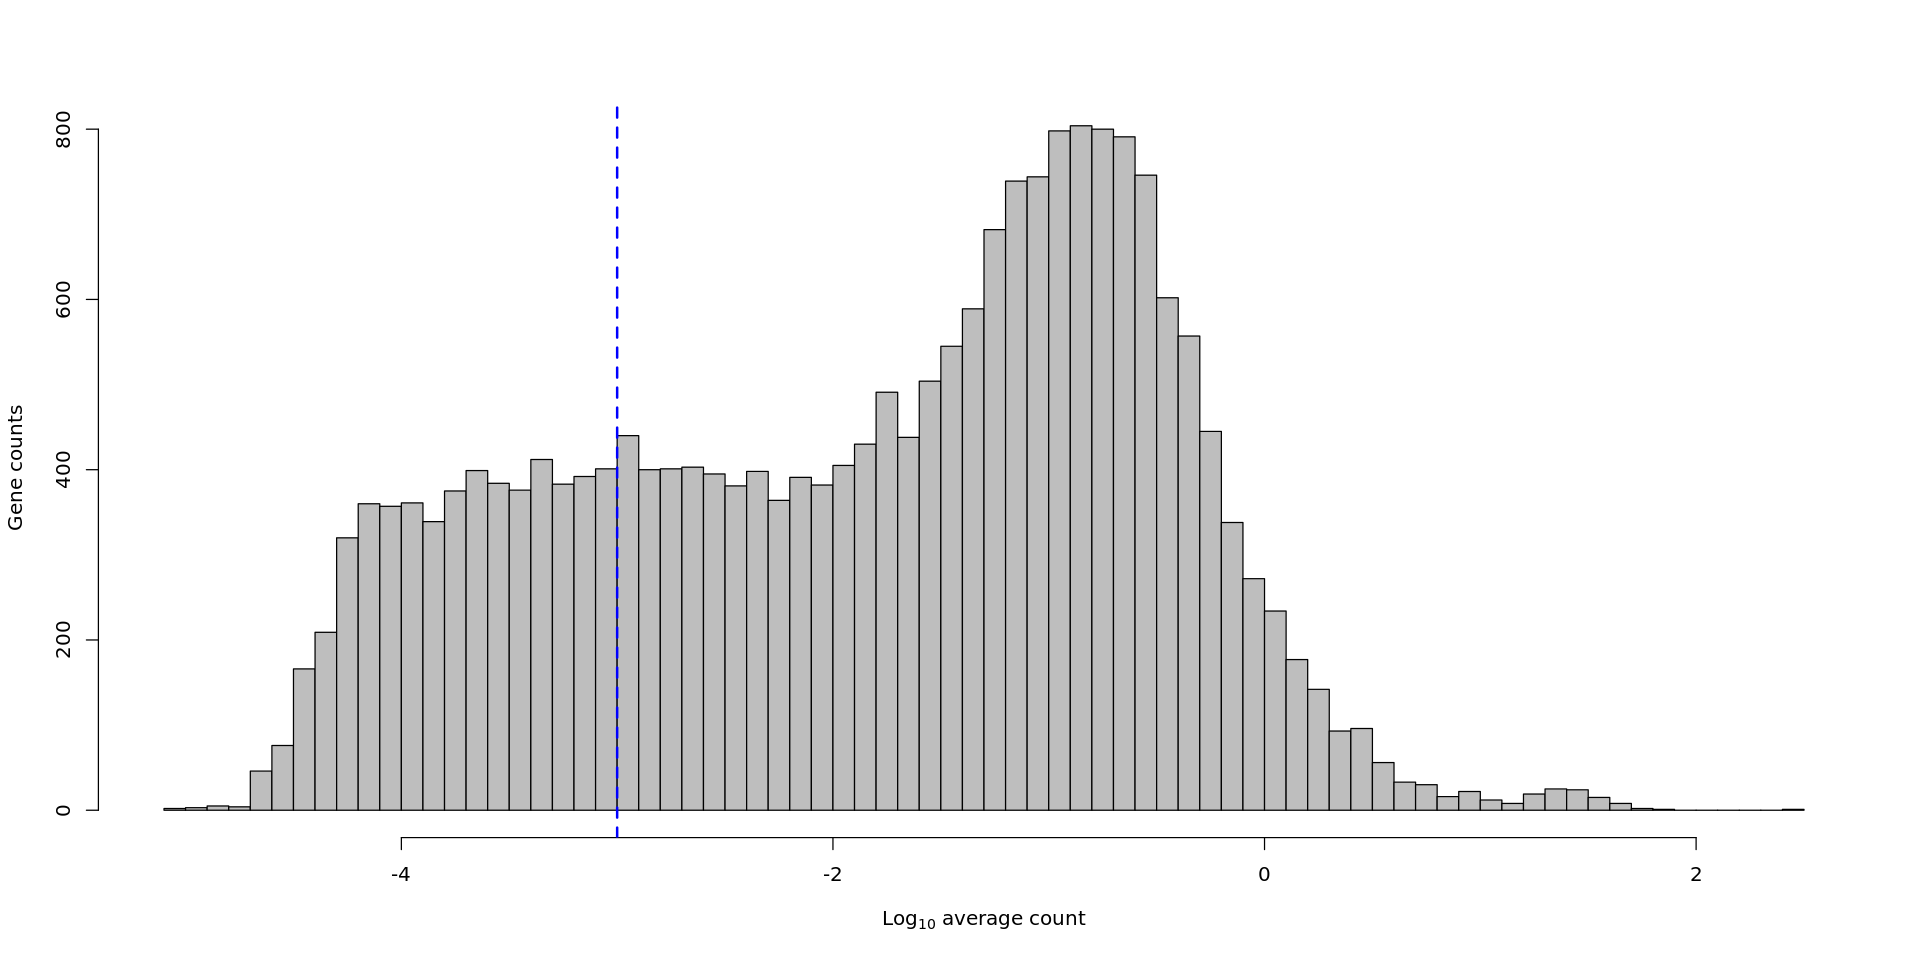

In [65]:
hist(log10(average.counts_SynJ), breaks = 100, main = "", col = "grey",
     xlab = expression(Log[10]~"average count"), ylab = "Gene counts")
abline(v = log10(0.001), col = "blue", lwd = 2, lty = 2)

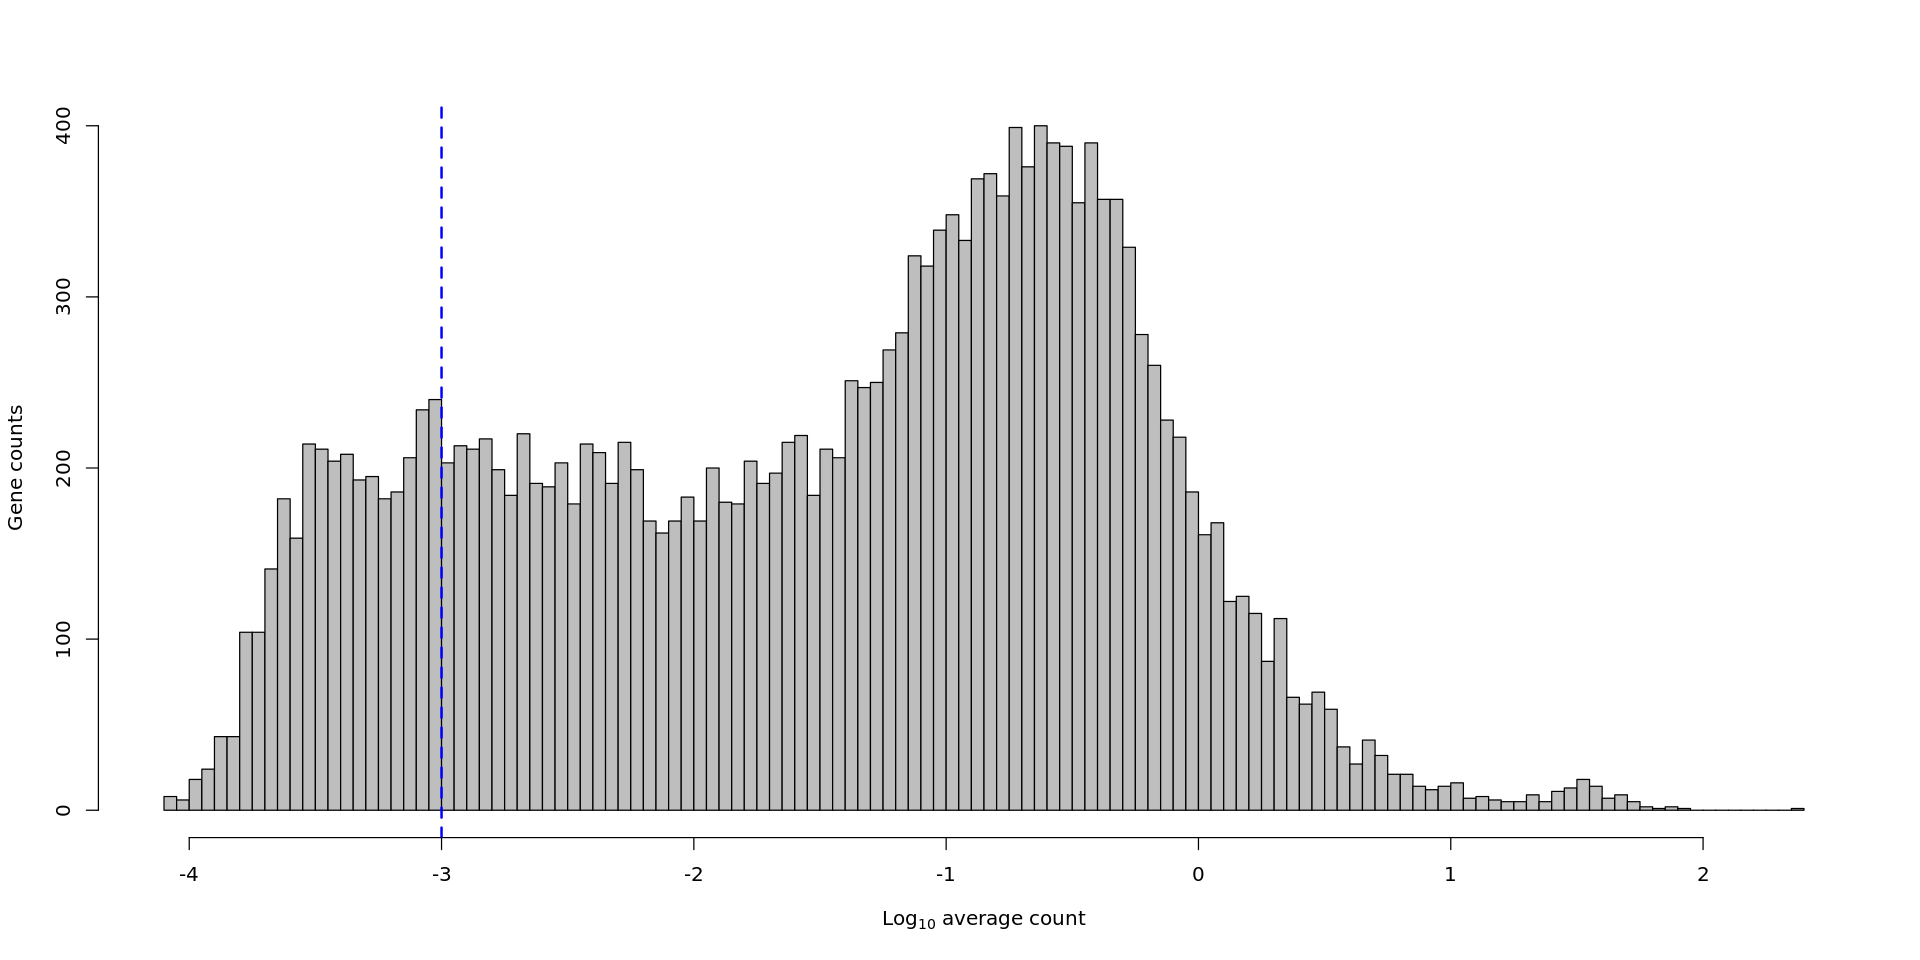

In [102]:
hist(log10(average.counts_12.5), breaks = 100, main = "", col = "grey",
     xlab = expression(Log[10]~"average count"), ylab = "Gene counts")
abline(v = log10(0.001), col = "blue", lwd = 2, lty = 2)

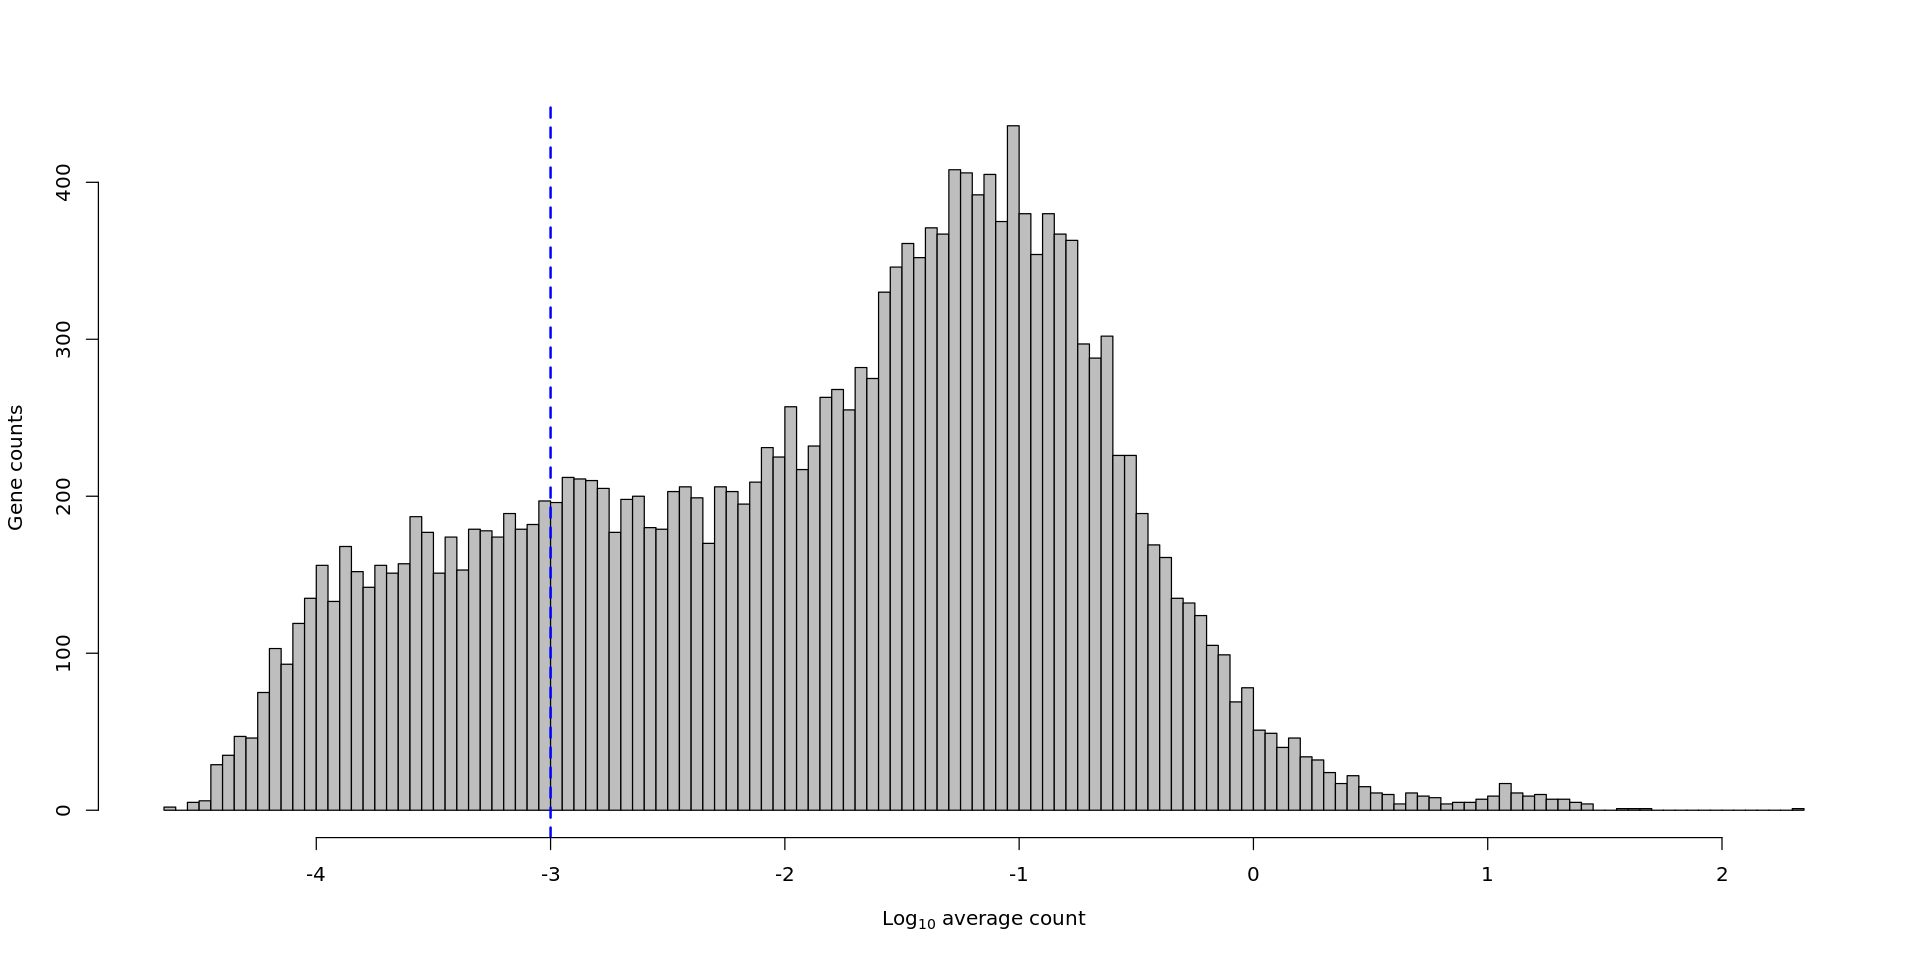

In [103]:
hist(log10(average.counts_13.5), breaks = 100, main = "", col = "grey",
     xlab = expression(Log[10]~"average count"), ylab = "Gene counts")
abline(v = log10(0.001), col = "blue", lwd = 2, lty = 2)

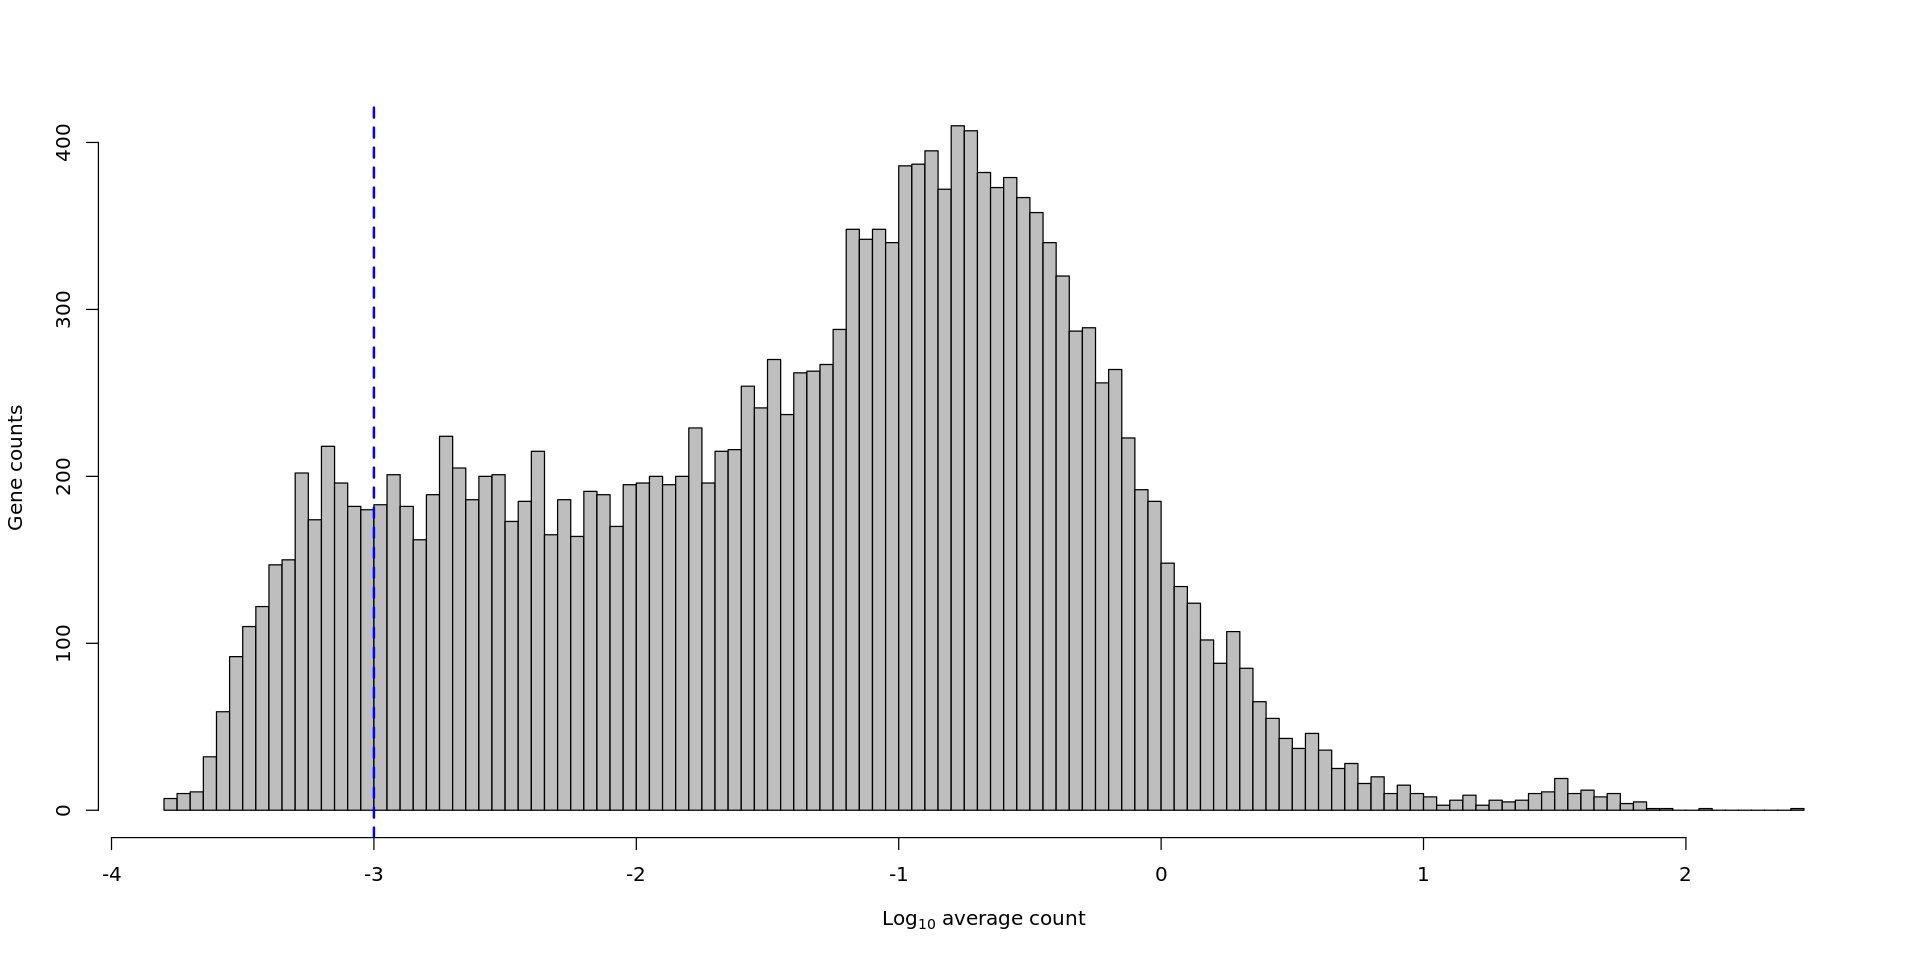

In [104]:
hist(log10(average.counts_14.5), breaks = 100, main = "", col = "grey",
     xlab = expression(Log[10]~"average count"), ylab = "Gene counts")
abline(v = log10(0.001), col = "blue", lwd = 2, lty = 2)

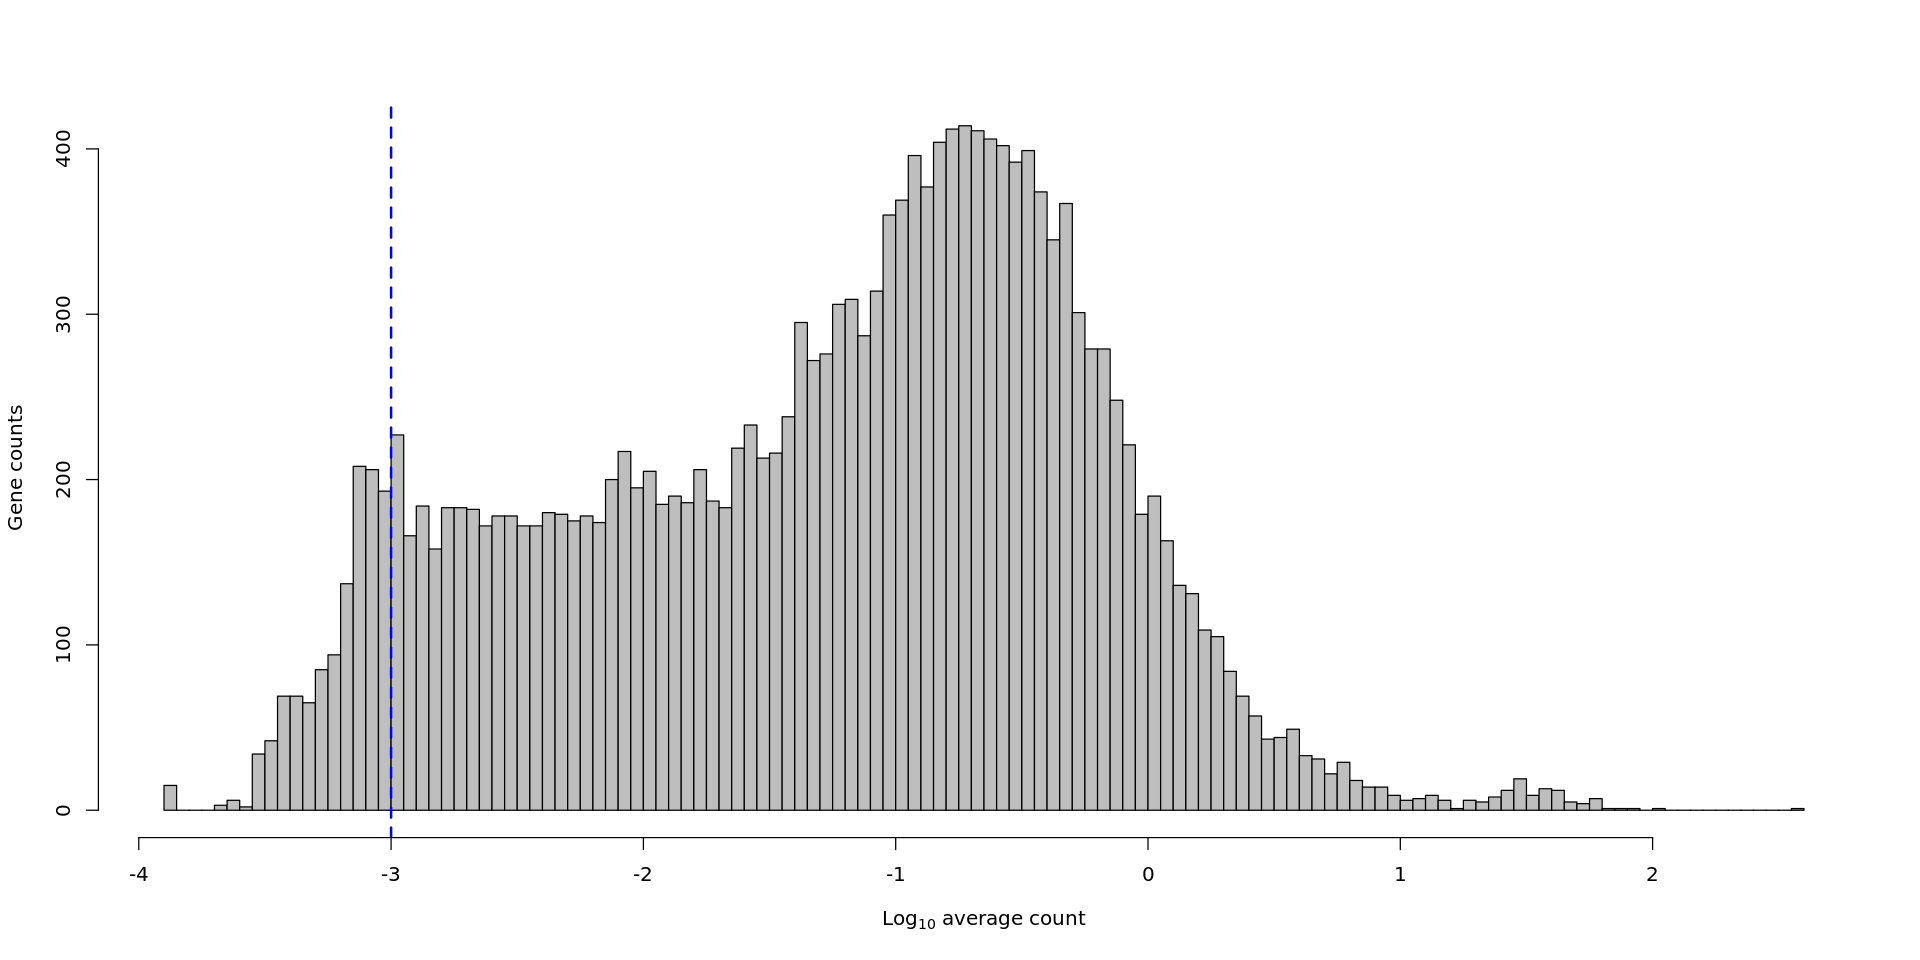

In [105]:
hist(log10(average.counts_15.5), breaks = 100, main = "", col = "grey",
     xlab = expression(Log[10]~"average count"), ylab = "Gene counts")
abline(v = log10(0.001), col = "blue", lwd = 2, lty = 2)

The mean-based filter is then applied to the data by subsetting the `SingleCellExperiment` object. This removes all rows corresponding to endogenous genes with abundances below the specified threshold.

In [40]:
SynJ <- SynJ.qc[genes.to.keep_SynJ,]
dim(SynJ)

[1] 16689 11793

In [106]:
E12.5 <- E12.5.qc[genes.to.keep_12.5,]
dim(E12.5)

[1] 16754  3033

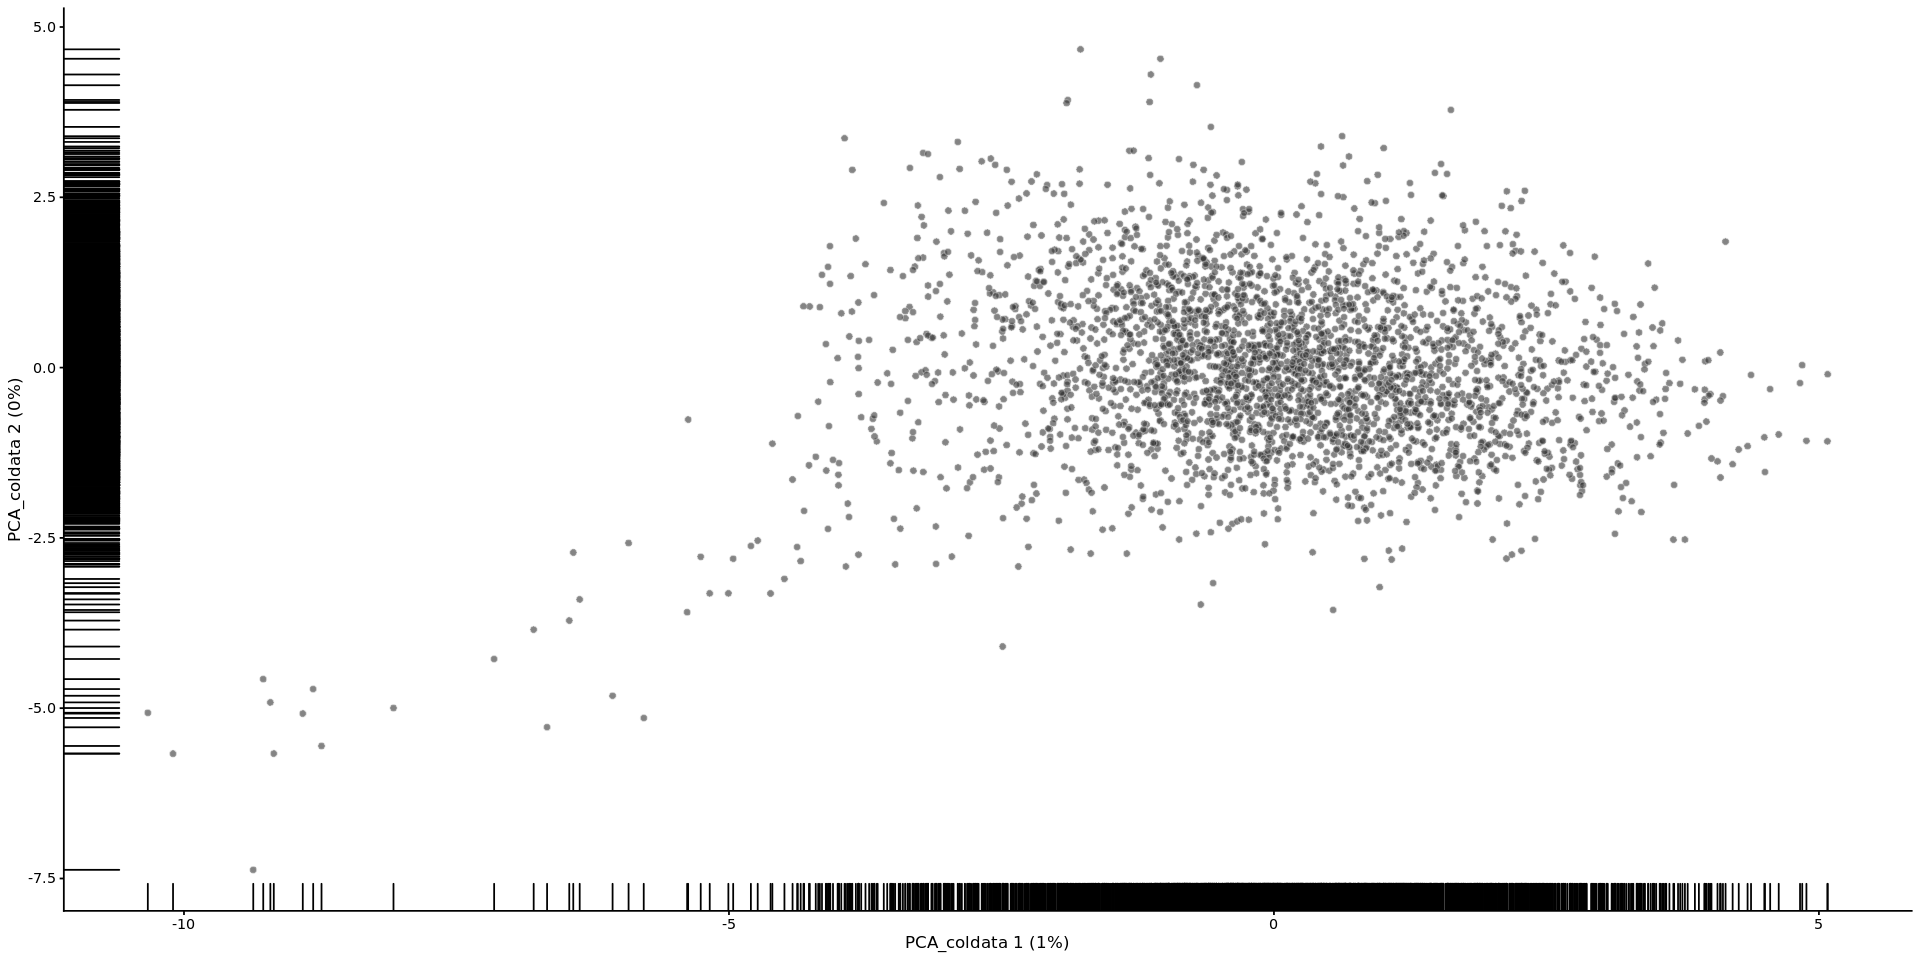

In [107]:
PCA.plot1 <- plotReducedDim(E12.5, dimred = "PCA_coldata") + geom_rug()
plot_grid(PCA.plot1)

In [108]:
E13.5 <- E13.5.qc[genes.to.keep_13.5,]
dim(E13.5)

[1] 15544  6537

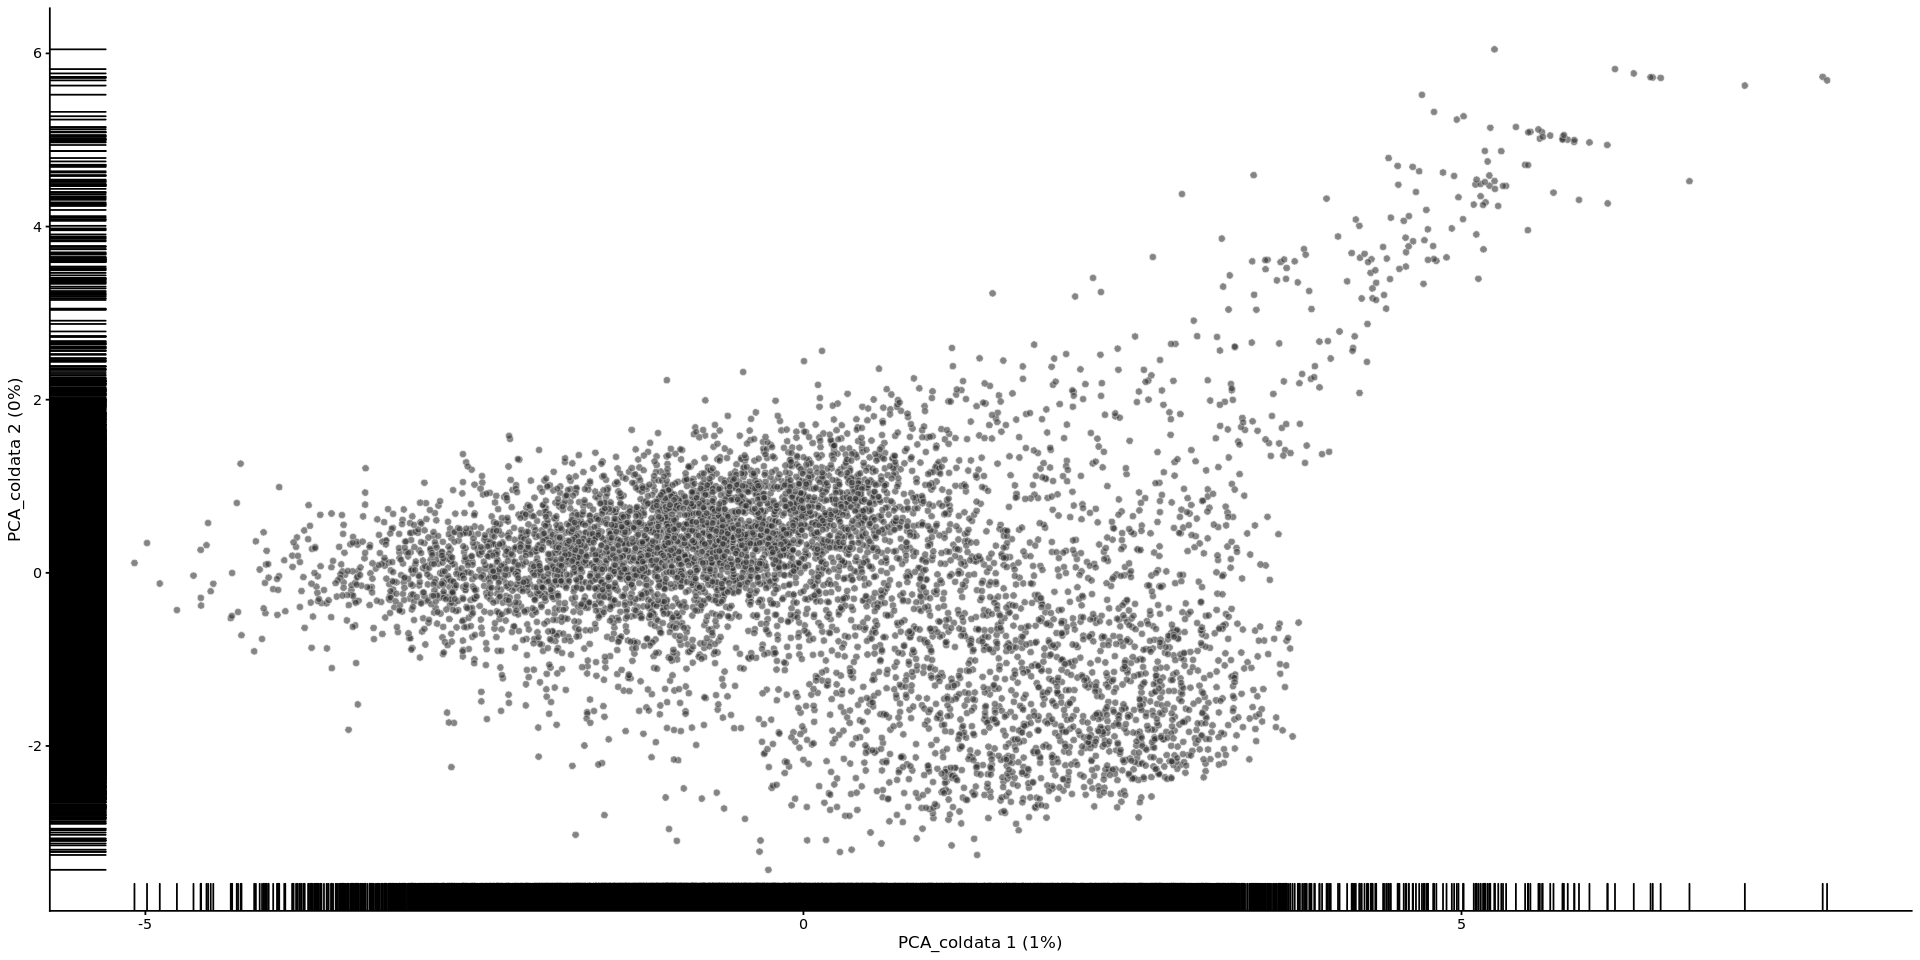

In [109]:
PCA.plot2 <- plotReducedDim(E13.5, dimred = "PCA_coldata") + geom_rug()
plot_grid(PCA.plot2)

In [110]:
E14.5 <- E14.5.qc[genes.to.keep_14.5,]

dim(E14.5)

[1] 16778  1839

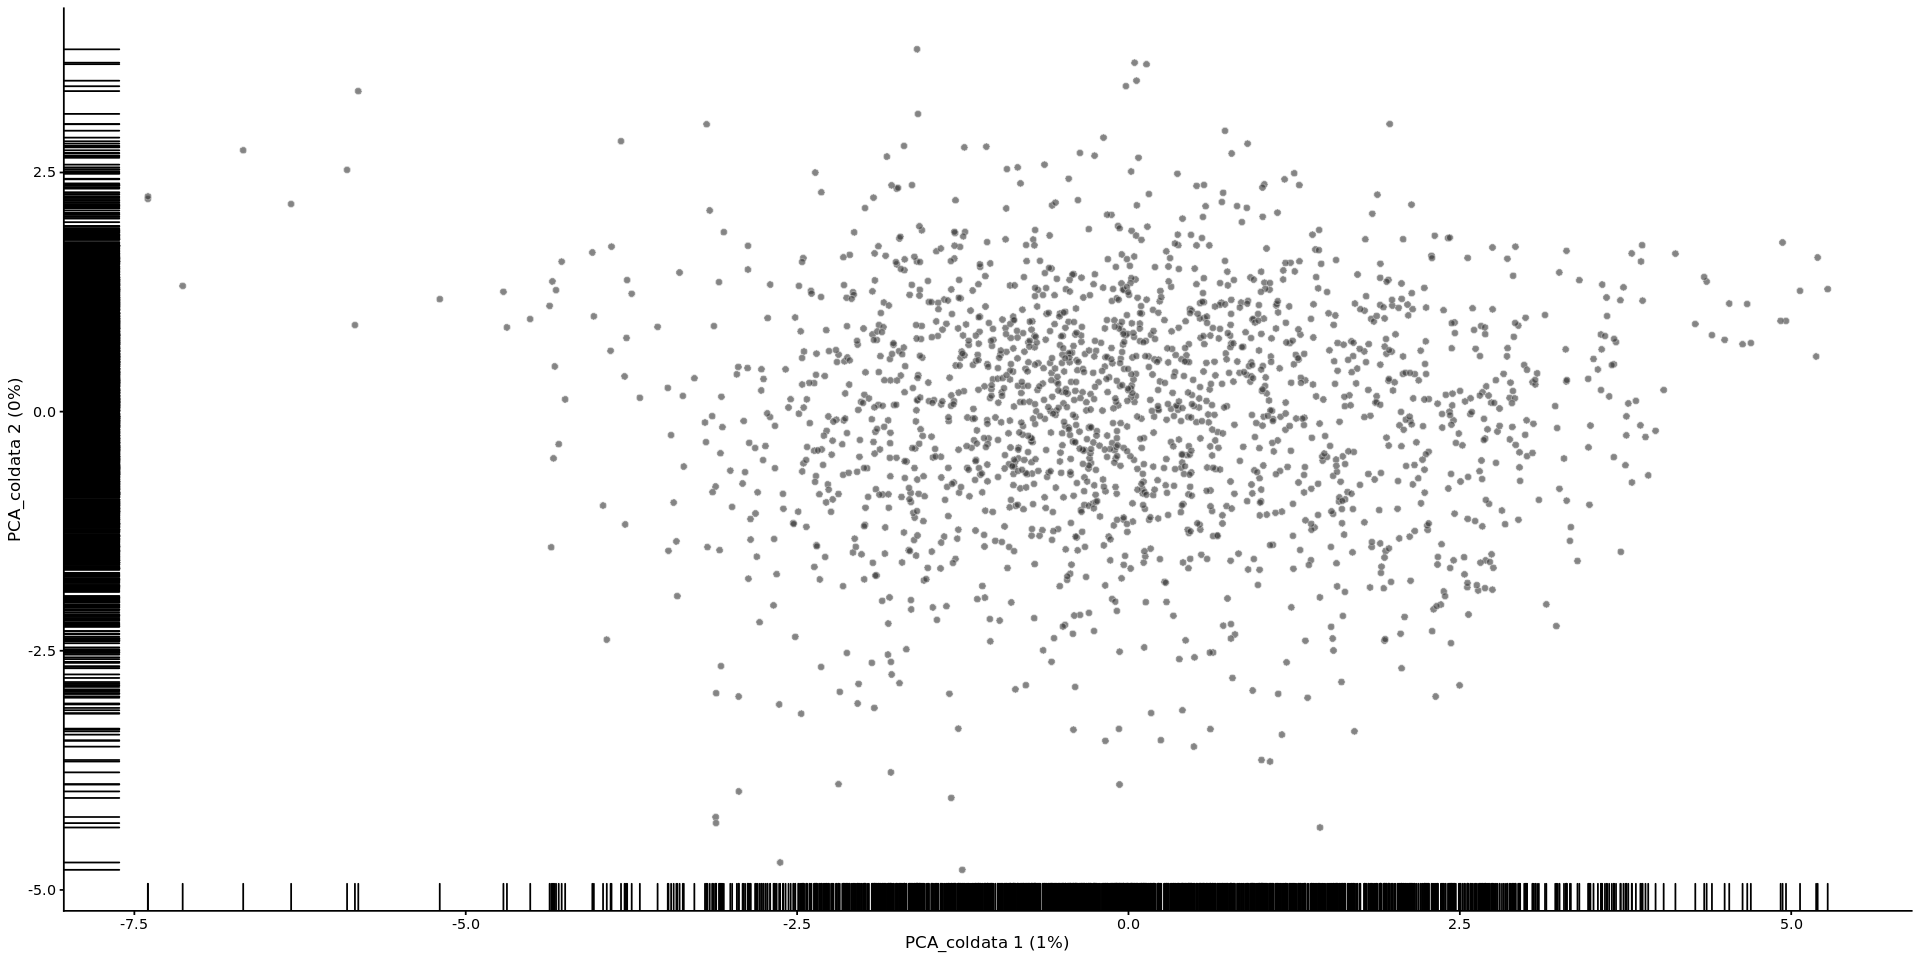

In [111]:
PCA.plot3 <- plotReducedDim(E14.5, dimred = "PCA_coldata") + geom_rug()
plot_grid(PCA.plot3)

In [112]:
E15.5 <- E15.5.qc[genes.to.keep_15.5,]
dim(E15.5)

[1] 16992  1123

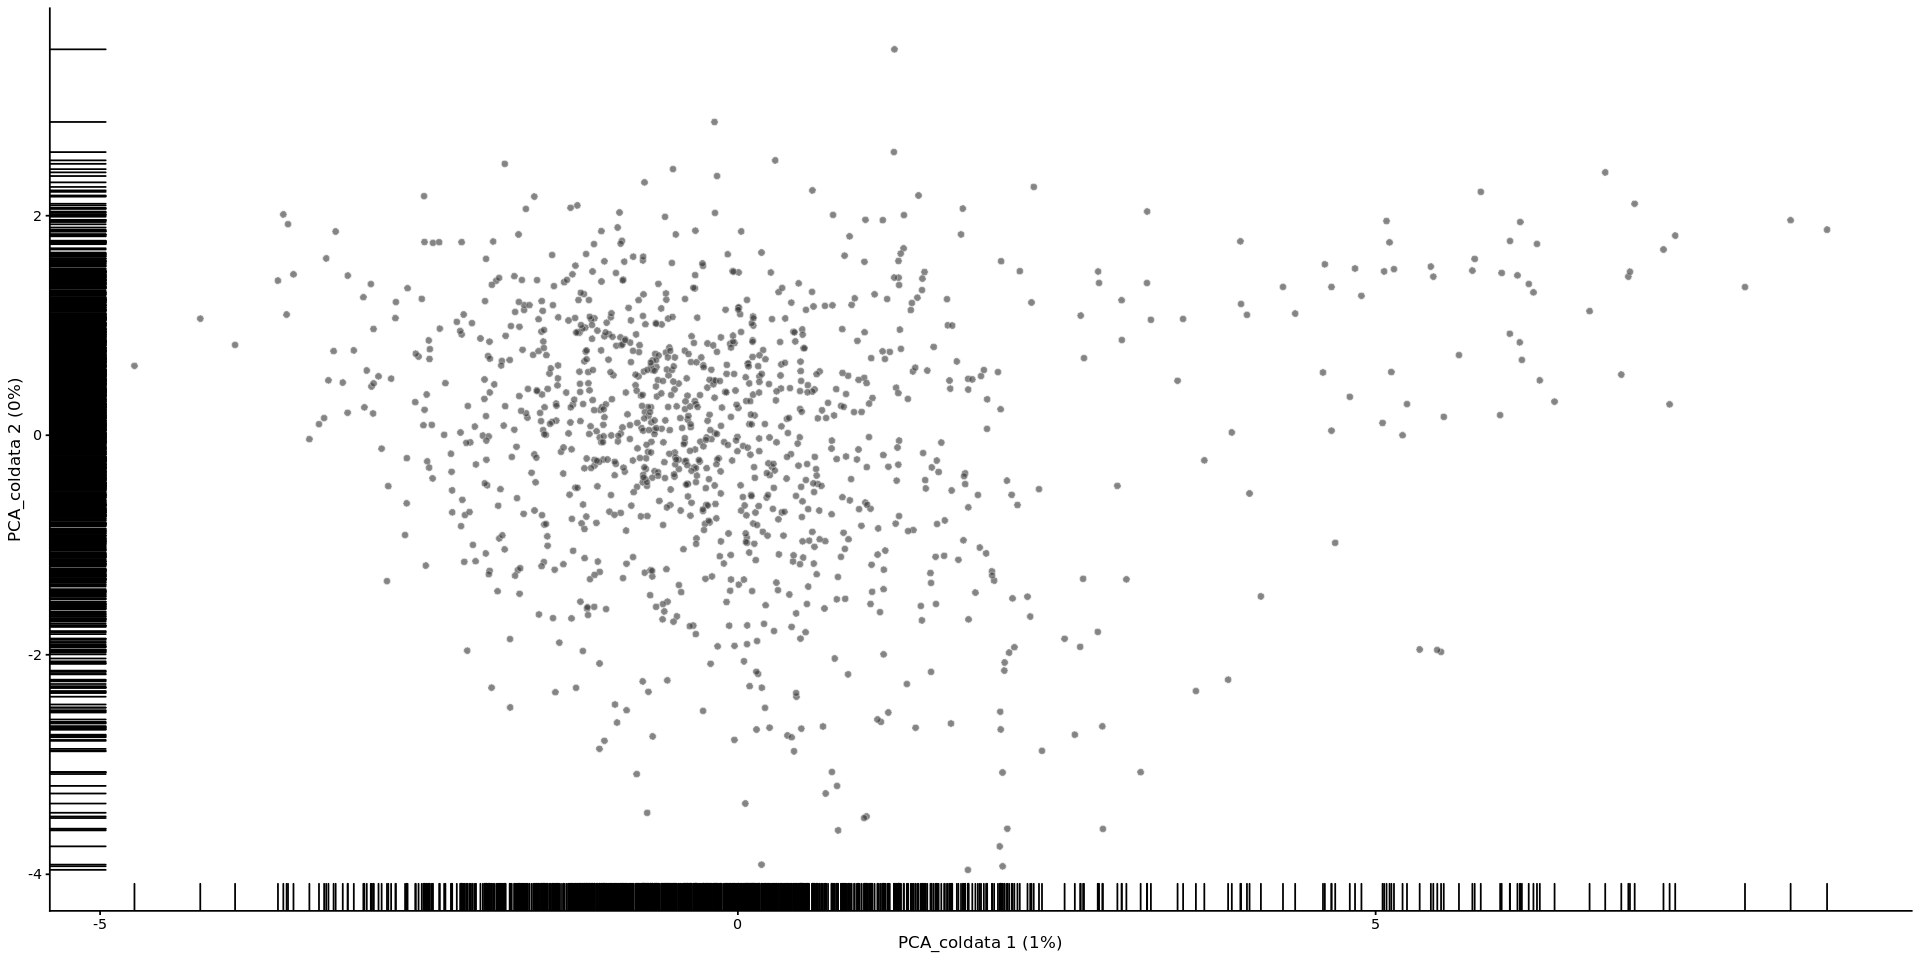

In [113]:
PCA.plot4 <- plotReducedDim(E15.5, dimred = "PCA_coldata") + geom_rug()
plot_grid(PCA.plot4)

Dimensions of the filtered and quality-controlled data are **13.590 genes and 2490 cells**.

Remove duplicate features:

In [41]:
rownames(SynJ) <- rowData(SynJ)$Symbol

SynJ <- SynJ[!duplicated(rownames(SynJ)),]
dim(SynJ)

[1] 16685 11793

In [114]:
rownames(E12.5) <- rowData(E12.5)$Symbol

E12.5 <- E12.5[!duplicated(rownames(E12.5)),]
dim(E12.5)

[1] 16747  3033

In [115]:
rownames(E13.5) <- rowData(E13.5)$Symbol

E13.5 <- E13.5[!duplicated(rownames(E13.5)),]
dim(E13.5)

[1] 15540  6537

In [116]:
rownames(E14.5) <- rowData(E14.5)$Symbol

E14.5 <- E14.5[!duplicated(rownames(E14.5)),]
dim(E14.5)

[1] 16775  1839

In [117]:
rownames(E15.5) <- rowData(E15.5)$Symbol

E15.5 <- E15.5[!duplicated(rownames(E15.5)),]
dim(E15.5)

[1] 16988  1123

Lastly, we look at the identities of the most highly expressed genes. This should be dominated by consitutively
expressed transcripts, such as those for ribosomal or mitochondrial proteins. The presence of other classes of
genes may be of concern when not consistent with expected biology. For example, a top set void of ribosomal
proteins and/or their pseudogenes is indicative of suboptimal alignment.

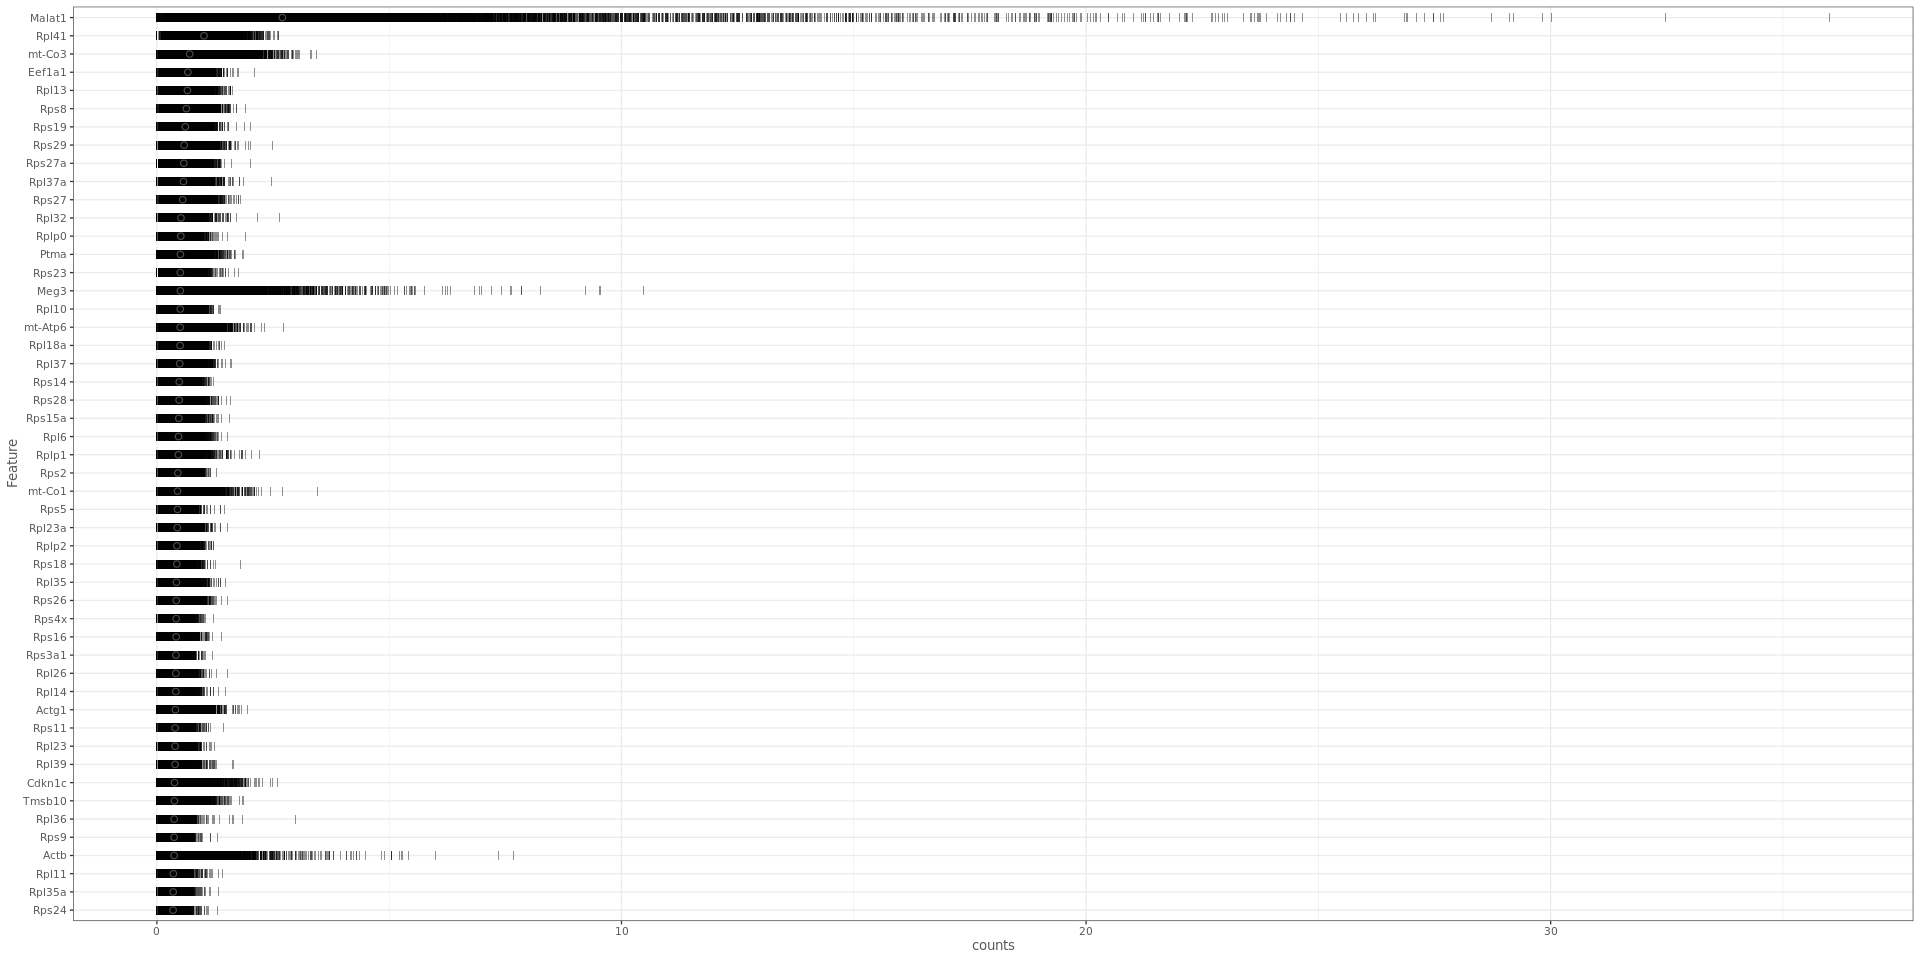

In [68]:
plotHighestExprs(SynJ, n = 50)
options(repr.plot.width = 8, repr.plot.height = 10)

## Finalization of the dataset

In order to be compatible with Seurat, log-transformed counts (logcounts assay) need to be added to the `SingleCellExperiment` object.

In [119]:
E12.5N <- logNormCounts(E12.5)
names(E12.5N@assays)
E13.5N <- logNormCounts(E13.5)
names(E13.5N@assays)
E14.5N <- logNormCounts(E14.5)
names(E14.5N@assays)
E15.5N <- logNormCounts(E15.5)
names(E15.5N@assays)

[1] "counts"    "logcounts"

[1] "counts"    "logcounts"

[1] "counts"    "logcounts"

[1] "counts"    "logcounts"

In [42]:
nSynJ <- logNormCounts(SynJ)
names(nSynJ@assays)

[1] "counts"    "logcounts"

In [120]:
head(E12.5)

class: SingleCellExperiment 
dim: 6 3033 
metadata(1): Samples
assays(1): counts
rownames(6): Sox17 Mrpl15 ... Rgs20 Atp6v1h
rowData names(11): ID Symbol ... total_counts log10_total_counts
colnames: NULL
colData names(39): Sample Barcode ... pct_counts_in_top_500_features_Mt
  outlier
reducedDimNames(1): PCA_coldata
spikeNames(0):
altExpNames(0):

In [43]:
saveRDS(E12.5N, file = "nE12.5SJ_scater_QCfiltered.Rds")
saveRDS(E13.5N, file = "nE13.5SJ_scater_QCfiltered.Rds")
saveRDS(E14.5N, file = "nE14.5SJ_scater_QCfiltered.Rds")
saveRDS(E15.5N, file = "nE15.5SJ_scater_QCfiltered.Rds")
saveRDS(nSynJ, file = "nSynJ_scater_QCfiltered.Rds")

ERROR: Error in saveRDS(E12.5N, file = "nE12.5SJ_scater_QCfiltered.Rds"): object 'E12.5N' not found


In [45]:
saveRDS(nSynJ, file = "nSynJ_scater_QCfiltered.Rds")

In [44]:
saveRDS(E12.5, file = "E12.5SJ_scater_QCfiltered.Rds")
saveRDS(E13.5, file = "E13.5SJ_scater_QCfiltered.Rds")
saveRDS(E14.5, file = "E14.5SJ_scater_QCfiltered.Rds")
saveRDS(E15.5, file = "E15.5SJ_scater_QCfiltered.Rds")
saveRDS(SynJ, file = "Bian.Rds")